# Analysis of the effect of starting locations on angular error in HumanA
author: Nora Maleki (noora.maleki@gmail.com)
April 2022

## Import libraries

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import statsmodels.formula.api as smf
import researchpy as rp

from matplotlib.lines import Line2D

%matplotlib inline

In [135]:
colorblind_palette = ['#2d004b', '#5ab4ac', '#b2182b', '#8c510a', '#4575b4','#8073ac']
sns.set_theme(font_scale=1, palette=colorblind_palette, style='darkgrid')

## Load data

In [136]:
FILE_PATH = r'../../data/01_main'
PLOT_PATH = f'{FILE_PATH}/plots/analysis/'
IMG_PATH = r'../../supplementary_material/images/'
IMAGE_PATH = f'{FILE_PATH}/plots/images/'

os.makedirs(os.path.dirname(PLOT_PATH), exist_ok=True)
os.makedirs(os.path.dirname(IMG_PATH), exist_ok=True)

In [137]:
df_cleaned = pd.read_csv(f'{FILE_PATH}/07_preprocessed.csv')
df_cleaned.head()

subject_id  body_pos_x  body_pos_z  pointer_pos_x  pointer_pos_z  \
0         365 -114.329147 -139.997375    -114.236984    -139.696228   
1         365  -65.669235 -159.945099     -65.474716    -159.710205   
2         365   38.849380   53.547638      38.471634      53.516281   
3         365   38.880081   53.564148      38.700195      53.581047   
4         365  110.754181  196.522675     110.428146     196.550751   

   pointer_dir_x  pointer_dir_z  building_center_z  building_center_x  \
0      -0.055459       0.989548          53.288437         -72.578285   
1       0.072550       0.992235          53.288437         -72.578285   
2      -0.993265      -0.112792          53.288437         -72.578285   
3      -0.995648      -0.065598          53.288437         -72.578285   
4      -0.941145      -0.321944          53.288437         -72.578285   

   human_agent  ...  dir_to_x_360  signed_180_angles  final_360_angles  \
0           46  ...     93.207763         -15.396716        344.603284   
1           46  ...     85.818077           6.037733          6.037733   
2           46  ...    186.478570          -6.345290        353.654710   
3           46  ...    183.769483          -3.627752        356.372248   
4           46  ...    198.884612          19.115237         19.115237   

   rounded_180_angles rounded_360_angles absolute_180_angles  \
0               -15.0              345.0           15.396716   
1                 6.0                6.0            6.037733   
2                -6.0              354.0            6.345290   
3                -4.0              356.0            3.627752   
4                19.0               19.0           19.115237   

   target_building_name  starting_loc_name starting_loc_meaningful  \
0        R (underwater)      S (tool shop)                    True   
1        R (underwater)      R (motorbike)                   False   
2        R (underwater)     R (purpul bat)                   False   
3        R (underwater)     R (purpul bat)                   False   
4        R (underwater)   R (bottle spray)                   False   

  starting_loc_meaningful_cat  
0                  meaningful  
1              non-meaningful  
2              non-meaningful  
3              non-meaningful  
4              non-meaningful  

[5 rows x 42 columns]

## Exploring the data

In [138]:
lmm_df = (df_cleaned[['absolute_180_angles', 'RT', 'distance_to_target']]
           .assign(subject_id=df_cleaned.subject_id.astype('category'),
                   starting_loc_id=df_cleaned.starting_loc_id.astype('category'),
                   starting_loc_name=df_cleaned.starting_loc_name.astype('category'),
                   human_agent=df_cleaned.human_agent.astype('category'),
                   trial_id_per_location=df_cleaned.trial_id_per_location.astype('category'),
                   trial_id=df_cleaned.trial_id.astype('category'),
                   starting_loc_meaningful=df_cleaned.starting_loc_meaningful.astype('category'),
                   starting_loc_meaningful_cat=df_cleaned.starting_loc_meaningful_cat.astype('category')
                   ))

lmm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7708 entries, 0 to 7707
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   absolute_180_angles          7708 non-null   float64 
 1   RT                           7708 non-null   float64 
 2   distance_to_target           7708 non-null   float64 
 3   subject_id                   7708 non-null   category
 4   starting_loc_id              7708 non-null   category
 5   starting_loc_name            7708 non-null   category
 6   human_agent                  7708 non-null   category
 7   trial_id_per_location        7708 non-null   category
 8   trial_id                     7708 non-null   category
 9   starting_loc_meaningful      7708 non-null   category
 10  starting_loc_meaningful_cat  7708 non-null   category
dtypes: category(8), float64(3)
memory usage: 265.6 KB


In [139]:
N = lmm_df.subject_id.nunique()
N

23

In [140]:
rp.codebook(lmm_df)

Variable: absolute_180_angles    Data Type: float64 

 Number of Obs.: 7708 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 7708 

 Range: [0.0098611111833122, 179.98338618386347] 
 Mean: 48.08 
 Standard Deviation: 44.3 
 Mode: 0.0098611111833122 
 10th Percentile: 4.061728074435263 
 25th Percentile: 12.864763109725644 
 50th Percentile: 33.697730978897454 
 75th Percentile: 71.5482171723512 
 90th Percentile: 117.00126423211762 





Variable: RT    Data Type: float64 

 Number of Obs.: 7708 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 7684 

 Range: [0.955792665481567, 29.289794206619263] 
 Mean: 7.77 
 Standard Deviation: 5.56 
 Mode: 1.3769052028656 
 10th Percentile: 2.431258296966553 
 25th Percentile: 3.621542990207672 
 50th Percentile: 6.063600659370422 
 75th Percentile: 10.153734385967253 
 90th Percentile: 15.809007906913761 





Variable: distance_to_target    Data Type: float64 

 Number of Obs.: 7708 
 Num

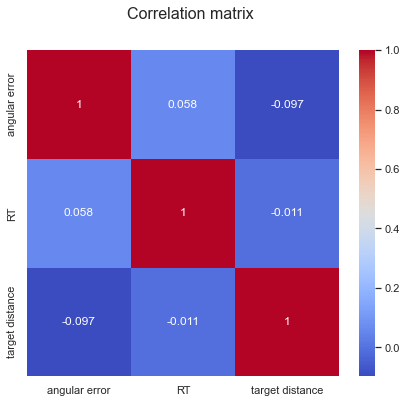

In [141]:
fig, _ = plt.subplots(figsize = (7, 6))

sns.heatmap(
    data=(lmm_df
          .rename(columns={'absolute_180_angles' : 'angular error',
                           'distance_to_target' : 'target distance'})
          .corr()),
    annot = True,
    fmt='.2g',
    cmap= 'coolwarm'
)

plt.suptitle(t='Correlation matrix', size=16, x=.45)

plt.show()

fig.savefig(f'{PLOT_PATH}/correlation_matrix_{N}.png', bbox_inches='tight', dpi=90)

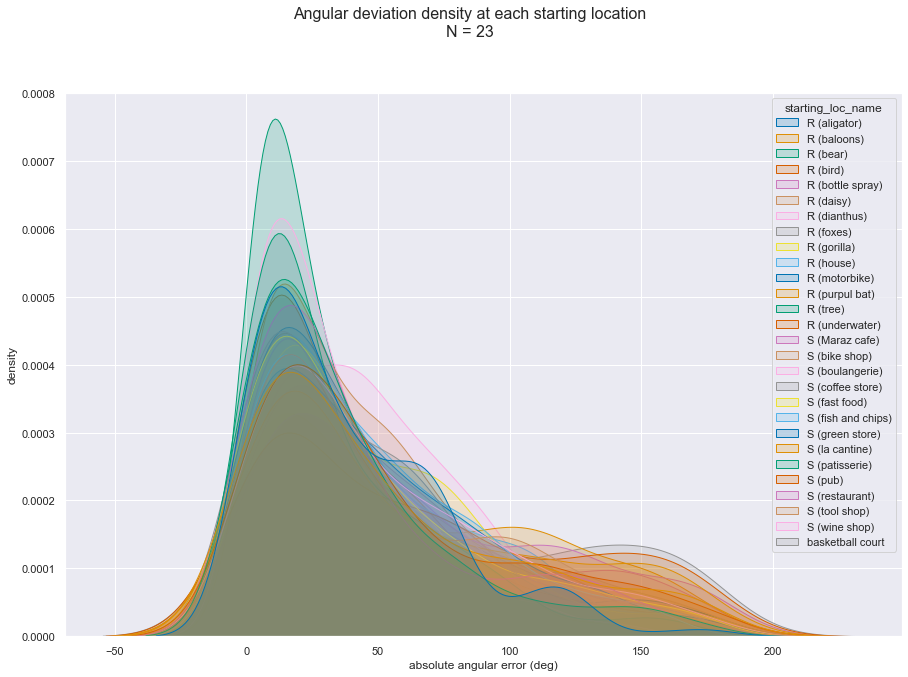

In [142]:
fig, _ = plt.subplots(figsize=(15,10))

sns.kdeplot(
    data=lmm_df,
    x='absolute_180_angles',
    hue='starting_loc_name',
    fill=True,
    palette='colorblind',
    alpha=.2,
).set(xlabel='absolute angular error (deg)', ylabel='density')


plt.suptitle(f'Angular deviation density at each starting location\nN = {N}', size=16, y=1)

fig.savefig(f'{PLOT_PATH}/density_angular_error_per_starting_location_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

In [143]:
mean_median_angle_RT = df_cleaned.groupby(['starting_loc_name', 'starting_loc_id'])[['absolute_180_angles', 'RT']].agg([np.mean, np.median]).reset_index()
mean_median_angle_RT

starting_loc_name starting_loc_id absolute_180_angles             \
                                                      mean     median   
0         R (aligator)              25           39.210534  28.955402   
1          R (baloons)              18           51.974447  35.074110   
2             R (bear)               7           38.726416  25.515426   
3             R (bird)              55           52.320296  37.695538   
4     R (bottle spray)              19           43.025639  28.005307   
5            R (daisy)              43           51.947655  34.293670   
6         R (dianthus)              40           51.191782  37.988246   
7            R (foxes)               1           46.730955  35.664767   
8          R (gorilla)               4           45.796754  29.536517   
9            R (house)              37           47.116459  37.384374   
10       R (motorbike)              36           48.984223  37.948755   
11      R (purpul bat)              30           59.634057  37.568774   
12            R (tree)              54           35.766733  21.200922   
13      R (underwater)              35           65.283762  52.494056   
14      S (Maraz cafe)               5           62.774833  51.251063   
15       S (bike shop)              38           39.224917  31.612215   
16     S (boulangerie)               2           33.525668  23.517914   
17    S (coffee store)              21           45.184079  29.532780   
18       S (fast food)              20           48.065795  35.356497   
19  S (fish and chips)              34           47.018872  35.346270   
20     S (green store)              45           45.285526  30.349194   
21      S (la cantine)              52           60.925282  47.160429   
22      S (patisserie)               9           27.502741  19.176842   
23             S (pub)              14           41.370585  27.834337   
24      S (restaurant)              29           56.852515  41.598931   
25       S (tool shop)              44           45.727937  32.478852   
26       S (wine shop)              51           48.430897  43.256934   
27    basketball court              58           66.847982  49.849104   

          RT            
        mean    median  
0   7.302352  5.570076  
1   8.584581  6.919941  
2   7.737437  6.015261  
3   7.849885  5.603920  
4   6.516070  5.278179  
5   8.664658  6.894657  
6   8.515813  6.350540  
7   7.400864  5.622906  
8   6.688874  5.334976  
9   8.680552  6.694255  
10  7.528648  6.293741  
11  8.479499  6.401871  
12  8.182545  6.274397  
13  9.081363  7.746539  
14  8.556873  7.490835  
15  7.607551  5.647205  
16  7.060426  5.233317  
17  7.421424  5.893713  
18  6.658104  5.803198  
19  8.181344  6.204588  
20  8.205571  6.329449  
21  8.086564  6.553893  
22  7.448431  5.487761  
23  8.277638  6.422948  
24  7.220371  6.004342  
25  7.424411  5.492207  
26  6.694309  4.627191  
27  7.445384  5.829484

In [144]:
mean_median_overall = mean_median_angle_RT.iloc[:,1:].agg([np.mean, np.median])
mean_median_overall

starting_loc_id absolute_180_angles                   RT          
                                      mean     median      mean    median
mean              29.5           48.087405  34.915972  7.767912  6.072192
median            32.0           47.067666  35.210190  7.672494  6.009801

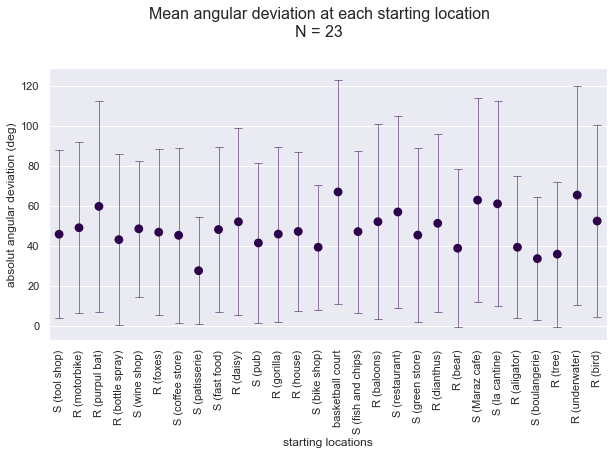

In [145]:
fig, _ = plt.subplots(figsize=(10,5))

sns.pointplot(
    data=df_cleaned,
    x='starting_loc_name',
    y='absolute_180_angles',
    ci='sd',
    join=False,
    errwidth=.5,
    capsize=.4,
).set(xlabel='starting locations', ylabel='absolut angular deviation (deg)')

plt.suptitle(f'Mean angular deviation at each starting location\nN = {N}', size=16, y=1.05)
plt.xticks(rotation=90)
plt.show()

fig.savefig(f'{PLOT_PATH}/mean_angular_deviation_pointplot_{N}.png', bbox_inches='tight', dpi=90)

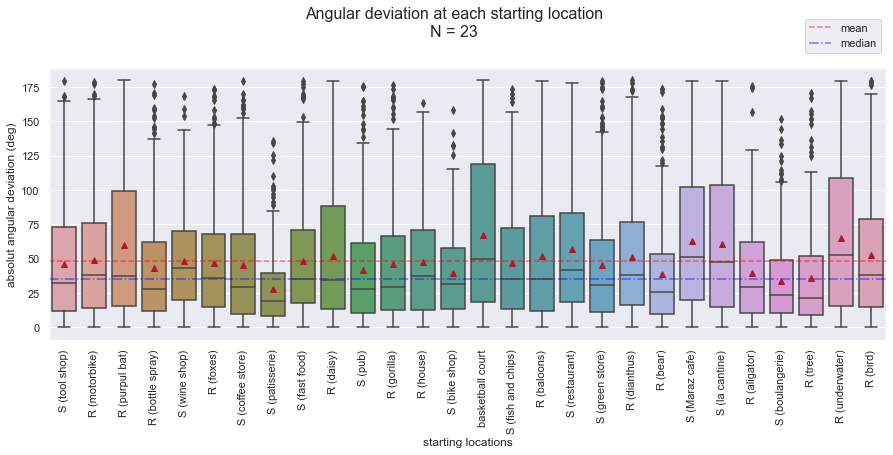

In [146]:
fig, _ = plt.subplots(figsize=(15,5))

sns.boxplot(
    data=df_cleaned,
    x='starting_loc_name',
    y='absolute_180_angles',
    showmeans= True,
    saturation=.5,
).set(xlabel='starting locations', ylabel='absolut angular deviation (deg)')

plt.axhline(y=mean_median_overall.loc['mean', ('absolute_180_angles', 'mean')], alpha=.5, ls='--', c='r', label='mean')
plt.axhline(y=mean_median_overall.loc['median', ('absolute_180_angles', 'median')], alpha=.5, ls='-.', c='b', label='median')

plt.suptitle(f'Angular deviation at each starting location\nN = {N}', size=16, y=1.05)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1.2), loc='upper right')
plt.show()

fig.savefig(f'{PLOT_PATH}/angular_deviation_boxplot_{N}.png', bbox_inches='tight', dpi=90)

## Creating DataFrames

In [148]:
lmm_summary_angle = (
    (
    pd.merge(
        rp.summary_cont(lmm_df.groupby(['starting_loc_id'])['absolute_180_angles']),
        lmm_df.groupby(['starting_loc_id'])['absolute_180_angles'].agg(np.median),
        left_index=True,
        right_index=True,
        how='left')
).rename(columns={'absolute_180_angles': 'Median'})
        .reset_index()
        .sort_values('Median')
)

lmm_summary_angle = lmm_summary_angle.assign(
    starting_loc_name=lmm_summary_angle.starting_loc_id.map(pd.Series(lmm_df.starting_loc_name.values, index=lmm_df.starting_loc_id).to_dict()),
    starting_loc_meaningful_cat=lmm_summary_angle.starting_loc_id.map(pd.Series(lmm_df.starting_loc_meaningful_cat.values, index=lmm_df.starting_loc_id).to_dict())
)

col_to_move = lmm_summary_angle.pop('starting_loc_name')
lmm_summary_angle.insert(1, 'starting_loc_name', col_to_move)
col_to_move = lmm_summary_angle.pop('starting_loc_meaningful_cat')
lmm_summary_angle.insert(2, 'starting_loc_meaningful_cat', col_to_move)

del col_to_move
lmm_summary_angle

starting_loc_id   starting_loc_name starting_loc_meaningful_cat    N  \
5                9      S (patisserie)                  meaningful  276   
25              54            R (tree)              non-meaningful  273   
1                2     S (boulangerie)                  meaningful  276   
4                7            R (bear)              non-meaningful  274   
6               14             S (pub)                  meaningful  276   
8               19    R (bottle spray)              non-meaningful  276   
11              25        R (aligator)              non-meaningful  276   
10              21    S (coffee store)                  meaningful  274   
2                4         R (gorilla)              non-meaningful  276   
22              45     S (green store)                  meaningful  275   
18              38       S (bike shop)                  meaningful  276   
21              44       S (tool shop)                  meaningful  276   
20              43           R (daisy)              non-meaningful  276   
7               18         R (baloons)              non-meaningful  274   
14              34  S (fish and chips)                  meaningful  275   
9               20       S (fast food)                  meaningful  276   
0                1           R (foxes)              non-meaningful  276   
17              37           R (house)              non-meaningful  276   
13              30      R (purpul bat)              non-meaningful  275   
26              55            R (bird)              non-meaningful  275   
16              36       R (motorbike)              non-meaningful  276   
19              40        R (dianthus)              non-meaningful  276   
12              29      S (restaurant)                  meaningful  276   
23              51       S (wine shop)                  meaningful  276   
24              52      S (la cantine)                  meaningful  274   
27              58    basketball court                  meaningful  275   
3                5      S (Maraz cafe)                  meaningful  276   
15              35      R (underwater)              non-meaningful  272   

       Mean       SD      SE  95% Conf.  Interval     Median  
5   27.5027  26.7153  1.6081    24.3370   30.6684  19.176842  
25  35.7667  36.3543  2.2003    31.4350   40.0984  21.200922  
1   33.5257  30.9483  1.8629    29.8584   37.1930  23.517914  
4   38.7264  39.5038  2.3865    34.0281   43.4247  25.515426  
6   41.3706  40.0602  2.4113    36.6236   46.1176  27.834337  
8   43.0256  42.7547  2.5735    37.9593   48.0920  28.005307  
11  39.2105  35.4404  2.1333    35.0109   43.4101  28.955402  
10  45.1841  43.9356  2.6542    39.9587   50.4095  29.532780  
2   45.7968  43.7805  2.6353    40.6089   50.9846  29.536517  
22  45.2855  43.6882  2.6345    40.0991   50.4720  30.349194  
18  39.2249  31.3367  1.8862    35.5116   42.9382  31.612215  
21  45.7279  41.9330  2.5241    40.7590   50.6969  32.478852  
20  51.9477  46.7182  2.8121    46.4117   57.4836  34.293670  
7   51.9744  48.8015  2.9482    46.1703   57.7786  35.074110  
14  47.0189  40.5075  2.4427    42.2100   51.8277  35.346270  
9   48.0658  41.1517  2.4770    43.1894   52.9422  35.356497  
0   46.7310  41.6004  2.5041    41.8014   51.6605  35.664767  
17  47.1165  39.8367  2.3979    42.3959   51.8370  37.384374  
13  59.6341  52.7650  3.1819    53.3701   65.8980  37.568774  
26  52.3203  47.8827  2.8874    46.6359   58.0047  37.695538  
16  48.9842  42.7402  2.5727    43.9196   54.0488  37.948755  
19  51.1918  44.6000  2.6846    45.9068   56.4768  37.988246  
12  56.8525  48.1531  2.8985    51.1465   62.5585  41.598931  
23  48.4309  34.0405  2.0490    44.3972   52.4646  43.256934  
24  60.9253  51.3694  3.1033    54.8158   67.0348  47.160429  
27  66.8480  56.0122  3.3777    60.1985   73.4974  49.849104  
3   62.7748  51.2321  3.0838    56.7040   68.8457  51.251063  
15  65.2838  54.8018  3.3228    58.7419   71.8256  52.494056

In [149]:
lmm_summary_RT = (
    (
        pd.merge(
            rp.summary_cont(lmm_df.groupby(['starting_loc_id'])['RT']),
            lmm_df.groupby(['starting_loc_id'])['RT'].agg(np.median),
            left_index=True,
            right_index=True,
            how='left')
    ).rename(columns={'RT': 'Median'})
        .reset_index()
        .sort_values('Median')
)

lmm_summary_RT = lmm_summary_RT.assign(
        starting_loc_name=lmm_summary_RT.starting_loc_id.map(pd.Series(lmm_df.starting_loc_name.values, index=lmm_df.starting_loc_id).to_dict()),
        starting_loc_meaningful_cat=lmm_summary_RT.starting_loc_id.map(pd.Series(lmm_df.starting_loc_meaningful_cat.values, index=lmm_df.starting_loc_id).to_dict())
)

col_to_move = lmm_summary_RT.pop('starting_loc_name')
lmm_summary_RT.insert(1, 'starting_loc_name', col_to_move)
col_to_move = lmm_summary_RT.pop('starting_loc_meaningful_cat')
lmm_summary_RT.insert(2, 'starting_loc_meaningful_cat', col_to_move)

del col_to_move
lmm_summary_RT

starting_loc_id   starting_loc_name starting_loc_meaningful_cat    N  \
23              51       S (wine shop)                  meaningful  276   
1                2     S (boulangerie)                  meaningful  276   
8               19    R (bottle spray)              non-meaningful  276   
2                4         R (gorilla)              non-meaningful  276   
5                9      S (patisserie)                  meaningful  276   
21              44       S (tool shop)                  meaningful  276   
11              25        R (aligator)              non-meaningful  276   
26              55            R (bird)              non-meaningful  275   
0                1           R (foxes)              non-meaningful  276   
18              38       S (bike shop)                  meaningful  276   
9               20       S (fast food)                  meaningful  276   
27              58    basketball court                  meaningful  275   
10              21    S (coffee store)                  meaningful  274   
12              29      S (restaurant)                  meaningful  276   
4                7            R (bear)              non-meaningful  274   
14              34  S (fish and chips)                  meaningful  275   
25              54            R (tree)              non-meaningful  273   
16              36       R (motorbike)              non-meaningful  276   
22              45     S (green store)                  meaningful  275   
19              40        R (dianthus)              non-meaningful  276   
13              30      R (purpul bat)              non-meaningful  275   
6               14             S (pub)                  meaningful  276   
24              52      S (la cantine)                  meaningful  274   
17              37           R (house)              non-meaningful  276   
20              43           R (daisy)              non-meaningful  276   
7               18         R (baloons)              non-meaningful  274   
3                5      S (Maraz cafe)                  meaningful  276   
15              35      R (underwater)              non-meaningful  272   

      Mean      SD      SE  95% Conf.  Interval    Median  
23  6.6943  5.4483  0.3280     6.0487    7.3399  4.627191  
1   7.0604  5.1914  0.3125     6.4453    7.6756  5.233317  
8   6.5161  4.6564  0.2803     5.9643    7.0678  5.278179  
2   6.6889  4.5912  0.2764     6.1448    7.2329  5.334976  
5   7.4484  5.6395  0.3395     6.7802    8.1167  5.487761  
21  7.4244  5.5829  0.3361     6.7628    8.0860  5.492207  
11  7.3024  5.2810  0.3179     6.6766    7.9281  5.570076  
26  7.8499  6.1923  0.3734     7.1148    8.5850  5.603920  
0   7.4009  5.2885  0.3183     6.7742    8.0275  5.622906  
18  7.6076  5.7867  0.3483     6.9218    8.2933  5.647205  
9   6.6581  4.0704  0.2450     6.1758    7.1404  5.803198  
27  7.4454  5.0049  0.3018     6.8512    8.0395  5.829484  
10  7.4214  4.9343  0.2981     6.8346    8.0083  5.893713  
12  7.2204  4.8334  0.2909     6.6476    7.7931  6.004342  
4   7.7374  5.5994  0.3383     7.0715    8.4034  6.015261  
14  8.1813  6.0011  0.3619     7.4689    8.8938  6.204588  
25  8.1825  5.8064  0.3514     7.4907    8.8744  6.274397  
16  7.5286  5.1380  0.3093     6.9198    8.1375  6.293741  
22  8.2056  5.7193  0.3449     7.5266    8.8845  6.329449  
19  8.5158  6.2805  0.3780     7.7716    9.2600  6.350540  
13  8.4795  6.4445  0.3886     7.7144    9.2446  6.401871  
6   8.2776  5.6343  0.3391     7.6100    8.9453  6.422948  
24  8.0866  5.9246  0.3579     7.3819    8.7912  6.553893  
17  8.6806  6.1421  0.3697     7.9527    9.4084  6.694255  
20  8.6647  5.7227  0.3445     7.9865    9.3428  6.894657  
7   8.5846  6.1367  0.3707     7.8547    9.3144  6.919941  
3   8.5569  4.9657  0.2989     7.9685    9.1453  7.490835  
15  9.0814  5.9830  0.3628     8.3672    9.7956  7.746539

## Extreme starting locations

### Angular error

#### Starting location with the `best` angular performance

In [150]:
s_median = lmm_summary_angle.Median.min()
best_df = lmm_summary_angle.query('Median==@s_median')
ID = best_df.starting_loc_id.values[0]
sl_name = lmm_df.query('starting_loc_id==@ID').starting_loc_name.unique()[0]

display(
    'Best starting location',
    f'name: {sl_name}',
    f'ID: {ID}',
    f'median: {np.round(best_df.Median.values[0], 2)}',
    f'difference to overall median: {np.round(np.abs(np.median(lmm_summary_angle.Median) - best_df.Median.values[0]), 2)}',
    f'overall median: {np.round(np.median(lmm_summary_angle.Median), 2)}',
    f'summary statistics',
    best_df,
)

'Best starting location'

'name: S (patisserie)'

'ID: 9'

'median: 19.18'

'difference to overall median: 16.03'

'overall median: 35.21'

'summary statistics'

starting_loc_id starting_loc_name starting_loc_meaningful_cat    N     Mean  \
5               9    S (patisserie)                  meaningful  276  27.5027   

        SD      SE  95% Conf.  Interval     Median  
5  26.7153  1.6081     24.337   30.6684  19.176842

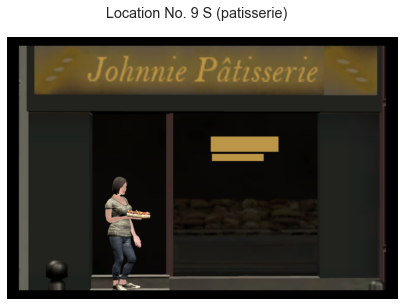

In [151]:
fig, ax = plt.subplots(figsize=(7, 5))

img_9_A = mpimg.imread(f'{IMG_PATH}/starting_locations/09_S(patisserie)_A.PNG')

plt.imshow(img_9_A)

ax.grid(None)
plt.axis('off')

# plt.suptitle(f'Best starting location based on angular deviation\nlocation No. 9 S (patisserie)\nN = {N}', y=.95)
plt.suptitle(f'Location No. 9 S (patisserie)', y=.95)

fig.savefig(f'{PLOT_PATH}/best_loc_angular_error_withHA_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

In [152]:
loc_id = 9
df = df_cleaned.query('starting_loc_id == @loc_id')

freq_df = pd.DataFrame({
    'angles' : df.rounded_360_angles.sort_values().unique(),
    'frequency' : df.rounded_360_angles.value_counts().sort_index().values
})

freq_df['proportion'] = freq_df.frequency / len(df_cleaned)

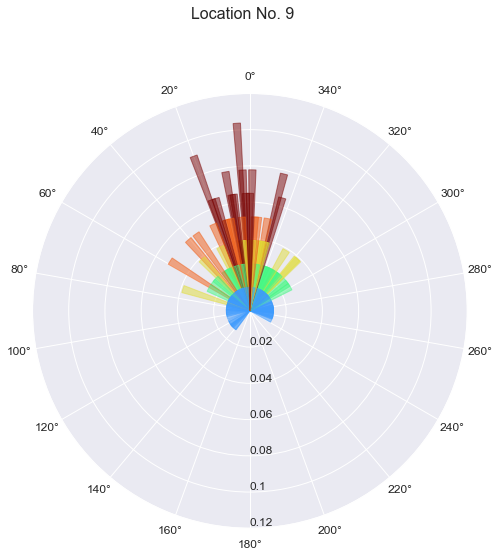

In [153]:
theta = np.deg2rad(freq_df.angles)
radii = freq_df.proportion
width = np.pi / (10*freq_df.frequency)

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(projection='polar'))

colors = plt.cm.turbo(freq_df.frequency / 5)

ax.bar(theta, radii, width=width, color=colors, edgecolor=colors, bottom=0, alpha=0.5)

ax.set_theta_zero_location('N')
ax.set_rlabel_position(180)
ax.tick_params(labelsize=12)
ax.set_thetagrids(range(0, 360, 20))
ax.set_yticks(ax.get_yticks())

labels = [round(x*100, 2) for x in ax.get_yticks()]
ax.set_yticklabels(labels=labels)

plt.suptitle(f'Location No. {loc_id}', size=16, y=1.03)

plt.savefig(f'{PLOT_PATH}/deviation_degrees_loc_nr_{loc_id}_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

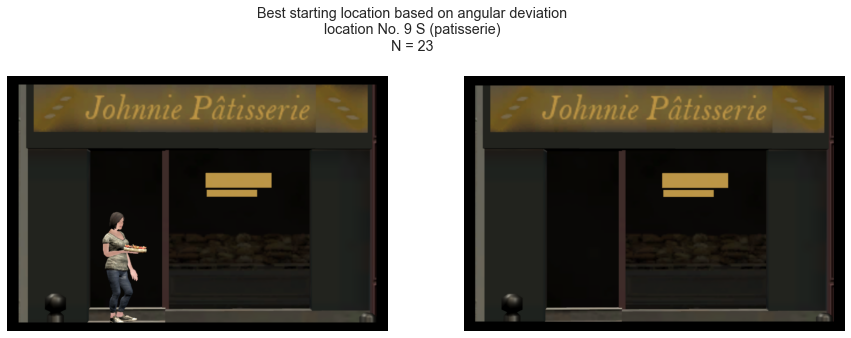

In [154]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

img_9_A = mpimg.imread(f'{IMG_PATH}/starting_locations/09_S(patisserie)_A.PNG')
img_9_noA = mpimg.imread(f'{IMG_PATH}/starting_locations/09_S(patisserie)_noA.PNG')

axes[0].imshow(img_9_A)
axes[1].imshow(img_9_noA)

[ax.grid(None) for ax in axes]
[ax.axis('off') for ax in axes]

plt.suptitle(f'Best starting location based on angular deviation\nlocation No. 9 S (patisserie)\nN = {N}', y=1.05)

fig.savefig(f'{PLOT_PATH}/best_loc_angular_error_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

#### Starting location with the `worst` angular performance

In [155]:
l_median = lmm_summary_angle.Median.max()
worst_df = lmm_summary_angle.query('Median==@l_median')
ID = worst_df.starting_loc_id.values[0]
sl_name = lmm_df.query('starting_loc_id==@ID').starting_loc_name.unique()[0]

display(
    'Worst starting location',
    f'name: {sl_name}',
    f'ID: {ID}',
    f'median: {np.round(worst_df.Median.values[0], 2)}',
    f'difference to overall median: {np.round(np.abs(np.median(lmm_summary_angle.Median) - worst_df.Median.values[0]), 2)}',
    f'overall median: {np.round(np.median(lmm_summary_angle.Median), 2)}',
    f'summary statistics',
    worst_df,
)

'Worst starting location'

'name: R (underwater)'

'ID: 35'

'median: 52.49'

'difference to overall median: 17.28'

'overall median: 35.21'

'summary statistics'

starting_loc_id starting_loc_name starting_loc_meaningful_cat    N  \
15              35    R (underwater)              non-meaningful  272   

       Mean       SD      SE  95% Conf.  Interval     Median  
15  65.2838  54.8018  3.3228    58.7419   71.8256  52.494056

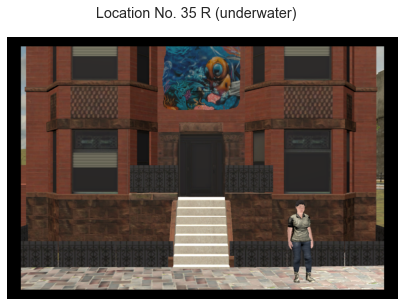

In [156]:
fig, ax = plt.subplots(figsize=(7, 5))

img_35_A = mpimg.imread(f'{IMG_PATH}/starting_locations/35_R(underwater)_A.PNG')

plt.imshow(img_35_A)

ax.grid(None)
plt.axis('off')

# plt.suptitle(f'Worst starting location based on angular deviation\nlocation No. 35 R (underwater)\nN = {N}', y=.95)
plt.suptitle(f'Location No. 35 R (underwater)', y=.95)

fig.savefig(f'{PLOT_PATH}/worst_loc_angular_error__withHA_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

In [157]:
loc_id = 35
df = df_cleaned.query('starting_loc_id == @loc_id')

freq_df = pd.DataFrame({
    'angles' : df.rounded_360_angles.sort_values().unique(),
    'frequency' : df.rounded_360_angles.value_counts().sort_index().values
})

freq_df['proportion'] = freq_df.frequency / len(df_cleaned)

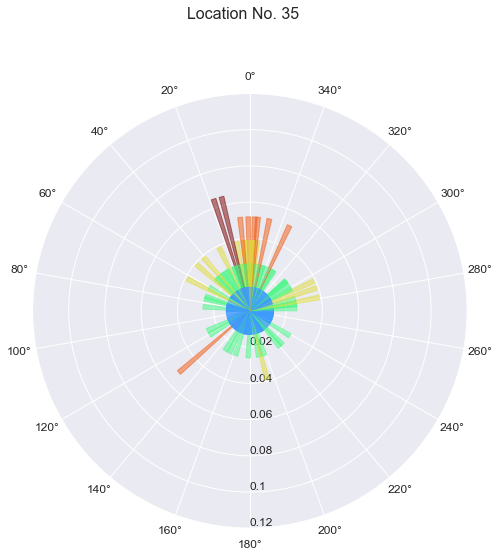

In [158]:
theta = np.deg2rad(freq_df.angles)
radii = freq_df.proportion
width = np.pi / (15*freq_df.frequency)

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(projection='polar'))

colors = plt.cm.turbo(freq_df.frequency / 5)

ax.bar(theta, radii, width=width, color=colors, edgecolor=colors, bottom=0, alpha=0.5)

ax.set_rmax(0.0012)
ax.set_theta_zero_location('N')
ax.set_rlabel_position(180)
ax.tick_params(labelsize=12)
ax.set_thetagrids(range(0, 360, 20))
ax.set_yticks(ax.get_yticks())

labels = [round(x*100, 2) for x in ax.get_yticks()]
ax.set_yticklabels(labels=labels)

plt.suptitle(f'Location No. {loc_id}', size=16, y=1.03)

plt.savefig(f'{PLOT_PATH}/deviation_degrees_loc_nr_{loc_id}_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

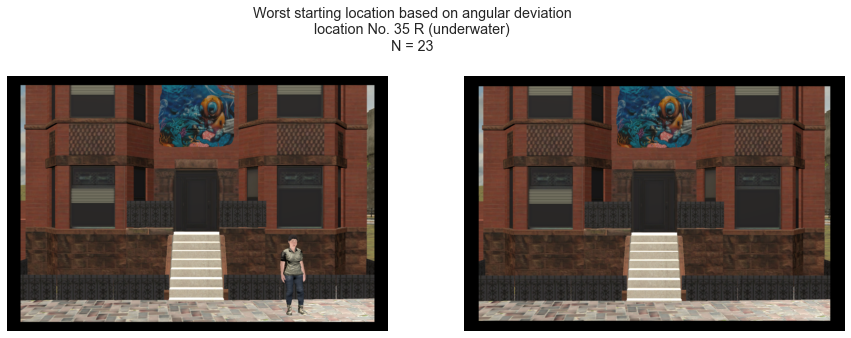

In [159]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

img_35_A = mpimg.imread(f'{IMG_PATH}/starting_locations/35_R(underwater)_A.PNG')
img_35_noA = mpimg.imread(f'{IMG_PATH}/starting_locations/35_R(underwater)_noA.PNG')

axes[0].imshow(img_35_A)
axes[1].imshow(img_35_noA)

[ax.grid(None) for ax in axes]
[ax.axis('off') for ax in axes]

plt.suptitle(f'Worst starting location based on angular deviation\nlocation No. 35 R (underwater)\nN = {N}', y=1.05)

fig.savefig(f'{PLOT_PATH}/worst_loc_angular_error_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

#### Difference between lowest median angular error and highest

In [160]:
np.round((worst_df.Median.values[0] - best_df.Median.values[0]), 2)

33.32

#### Plot

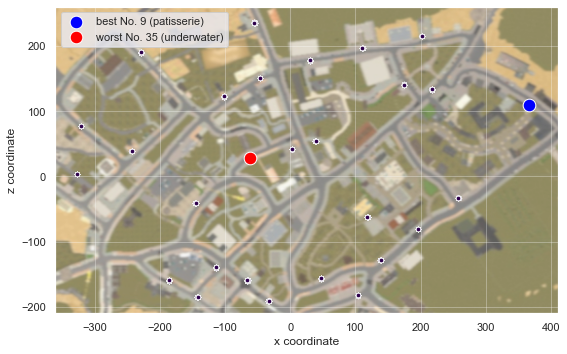

In [161]:
fig, ax = plt.subplots(figsize=(9,9))

best_loc_coord = df_cleaned.query('starting_loc_id == 9')[['starting_loc_x', 'starting_loc_z']].drop_duplicates(keep='first')
worst_loc_coord = df_cleaned.query('starting_loc_id == 35')[['starting_loc_x', 'starting_loc_z']].drop_duplicates(keep='first')

img = plt.imread(f'{IMAGE_PATH}/starting_loc_map_color.jpg')
ax.imshow(img, extent=[-360, 410, -210, 260], alpha=.8)

sns.scatterplot(
    data=df_cleaned,
    x='body_pos_x',
    y='body_pos_z',
    s=80,
    marker='.'
).set(xlabel='x coordinate', ylabel='z coordinate')

sns.scatterplot(
    data=best_loc_coord,
    x='starting_loc_x',
    y='starting_loc_z',
    s=160,
    c=['blue'],
    marker='o',
    label='best No. 9 (patisserie)',
)

sns.scatterplot(
    data=worst_loc_coord,
    x='starting_loc_x',
    y='starting_loc_z',
    s=160,
    c=['red'],
    marker='o',
    label='worst No. 35 (underwater)',
)


# plt.suptitle(t=f'Angular error extremes in starting locations\nN = {N}', size=16)

ax.grid(alpha=.3)

# plt.legend(bbox_to_anchor=(1.05, 1.05))

fig.savefig(f'{PLOT_PATH}/best_worst_starting_locations_map.png', bbox_inches='tight', dpi=90)

plt.show()

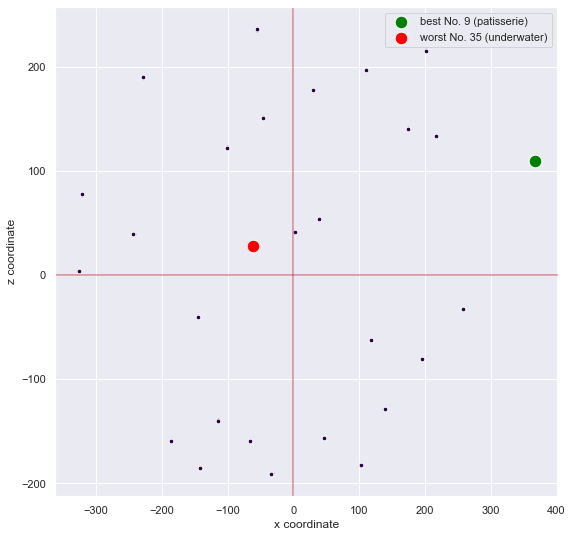

In [162]:
fig, _ = plt.subplots(figsize=(9,9))

best_loc_coord = df_cleaned.query('starting_loc_id == 9')[['starting_loc_x', 'starting_loc_z']].drop_duplicates(keep='first')
worst_loc_coord = df_cleaned.query('starting_loc_id == 35')[['starting_loc_x', 'starting_loc_z']].drop_duplicates(keep='first')

sns.scatterplot(
    data=df_cleaned,
    x='body_pos_x',
    y='body_pos_z',
    s=80,
    marker='.'
).set(xlabel='x coordinate', ylabel='z coordinate')

sns.scatterplot(
    data=best_loc_coord,
    x='starting_loc_x',
    y='starting_loc_z',
    s=160,
    c=['green'],
    marker='o',
    label='best No. 9 (patisserie)',
)

sns.scatterplot(
    data=worst_loc_coord,
    x='starting_loc_x',
    y='starting_loc_z',
    s=160,
    c=['red'],
    marker='o',
    label='worst No. 35 (underwater)',
)


# plt.suptitle(t=f'Angular error extremes in starting locations\nN = {N}', size=16)
plt.axvline(x=0, color=colorblind_palette[2], alpha=.5)
plt.axhline(y=0, color=colorblind_palette[2], alpha=.5)

plt.grid(1)

# plt.legend(bbox_to_anchor=(1.05, 1.05))

fig.savefig(f'{PLOT_PATH}/best_worst_starting_locations.png', bbox_inches='tight', dpi=90)

plt.show()

#### Results

**Best starting location**: No. 9 `(S (patisserie))` with the lowest median `19.177` in angular error.
**Worst starting location**: No. 35 `(R (underwater))` with the highest median `52.494` in angular error.

**Degree difference between best and worst starting location**: `33.317` degree

### Reaction Times (RT)

#### Starting location with the `lease` RT

In [163]:
s_median = lmm_summary_RT.Median.min()
fastest_df = lmm_summary_RT.query('Median==@s_median')
ID = fastest_df.starting_loc_id.values[0]
sl_name = lmm_df.query('starting_loc_id==@ID').starting_loc_name.unique()[0]

display(
    'Fastest starting location',
    f'name: {sl_name}',
    f'ID: {ID}',
    f'median: {np.round(fastest_df.Median.values[0], 2)}',
    f'difference to overall median: {np.round(np.abs(np.median(lmm_summary_RT.Median) - fastest_df.Median.values[0]), 2)}',
    f'overall median: {np.round(np.median(lmm_summary_RT.Median), 2)}',
    f'summary statistics',
    fastest_df,
)

'Fastest starting location'

'name: S (wine shop)'

'ID: 51'

'median: 4.63'

'difference to overall median: 1.38'

'overall median: 6.01'

'summary statistics'

starting_loc_id starting_loc_name starting_loc_meaningful_cat    N    Mean  \
23              51     S (wine shop)                  meaningful  276  6.6943   

        SD     SE  95% Conf.  Interval    Median  
23  5.4483  0.328     6.0487    7.3399  4.627191

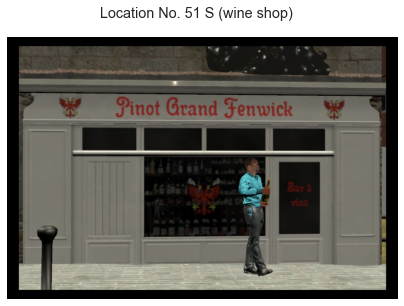

In [164]:
fig, ax = plt.subplots(figsize=(7, 5))

img_51_A = mpimg.imread(f'{IMG_PATH}/starting_locations/51_S(wine shop)_A.PNG')

plt.imshow(img_51_A)

ax.grid(None)
plt.axis('off')

plt.suptitle(f'Location No. 51 S (wine shop)', y=.95)

fig.savefig(f'{PLOT_PATH}/fastest_loc_RT_withHA_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

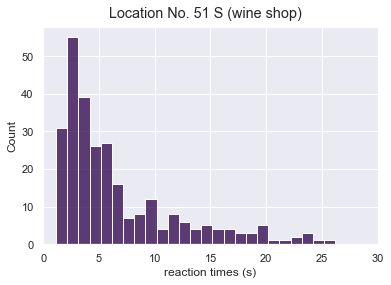

In [165]:
loc_id = 51
df = df_cleaned.query('starting_loc_id == @loc_id')

sns.histplot(
    data=df,
    x='RT',
    binwidth=1
).set(xlabel='reaction times (s)')

plt.xlim(0,30)
plt.suptitle(f'Location No. 51 S (wine shop)', y=.95)
plt.savefig(f'{PLOT_PATH}/fastest_loc_RT_dist_{loc_id}_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

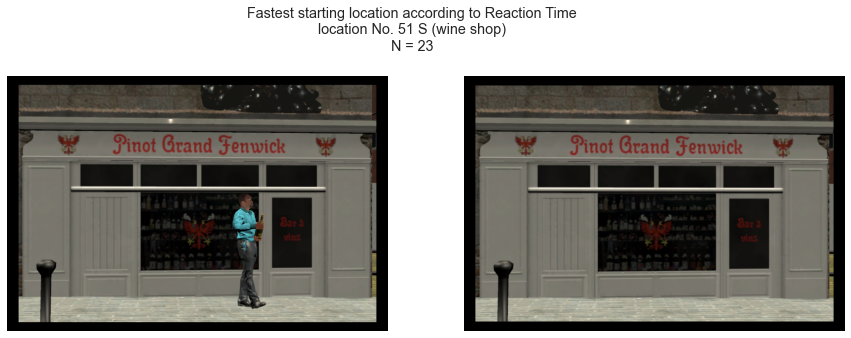

In [166]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

img_51_A = mpimg.imread(f'{IMG_PATH}/starting_locations/51_S(wine shop)_A.PNG')
img_51_noA = mpimg.imread(f'{IMG_PATH}/starting_locations/51_S(wine shop)_noA.PNG')

axes[0].imshow(img_51_A)
axes[1].imshow(img_51_noA)

[ax.grid(None) for ax in axes]
[ax.axis('off') for ax in axes]

plt.suptitle(f'Fastest starting location according to Reaction Time\nlocation No. 51 S (wine shop)\nN = {N}', y=1.05)

fig.savefig(f'{PLOT_PATH}/fastest_loc_RT_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

#### Starting location with the `slowest` RT

In [167]:
l_median = lmm_summary_RT.Median.max()
slowest_df = lmm_summary_RT.query('Median==@l_median')
ID = slowest_df.starting_loc_id.values[0]
sl_name = lmm_df.query('starting_loc_id==@ID').starting_loc_name.unique()[0]

display(
    'Slowest starting location',
    f'name: {sl_name}',
    f'ID: {ID}',
    f'median: {np.round(slowest_df.Median.values[0], 2)}',
    f'difference to overall median: {np.round(np.abs(np.median(lmm_summary_RT.Median) - slowest_df.Median.values[0]), 2)}',
    f'overall median: {np.round(np.median(lmm_summary_RT.Median), 2)}',
    f'summary statistics',
    slowest_df,
)

'Slowest starting location'

'name: R (underwater)'

'ID: 35'

'median: 7.75'

'difference to overall median: 1.74'

'overall median: 6.01'

'summary statistics'

starting_loc_id starting_loc_name starting_loc_meaningful_cat    N    Mean  \
15              35    R (underwater)              non-meaningful  272  9.0814   

       SD      SE  95% Conf.  Interval    Median  
15  5.983  0.3628     8.3672    9.7956  7.746539

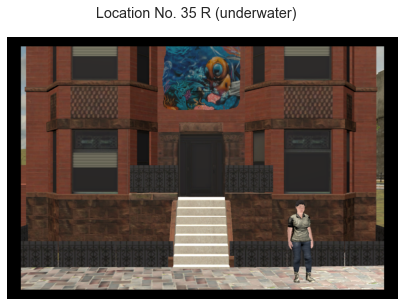

In [168]:
loc_id = 35

fig, ax = plt.subplots(figsize=(7, 5))

img_35_A = mpimg.imread(f'{IMG_PATH}/starting_locations/35_R(underwater)_A.PNG')

plt.imshow(img_35_A)

ax.grid(None)
plt.axis('off')

plt.suptitle(f'Location No. 35 R (underwater)', y=.95)

fig.savefig(f'{PLOT_PATH}/slowest_loc_{loc_id}_withHA_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

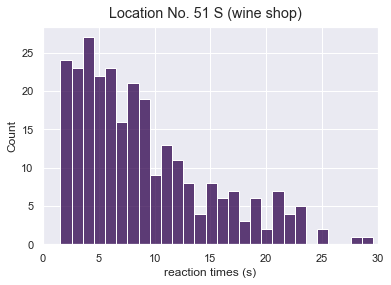

In [169]:
loc_id = 35

df = df_cleaned.query('starting_loc_id == @loc_id')

sns.histplot(
    data=df,
    x='RT',
    binwidth=1
).set(xlabel='reaction times (s)')

plt.xlim(0,30)
plt.suptitle(f'Location No. 51 S (wine shop)', y=.95)
plt.savefig(f'{PLOT_PATH}/slowest_loc_RT_dist_{loc_id}_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

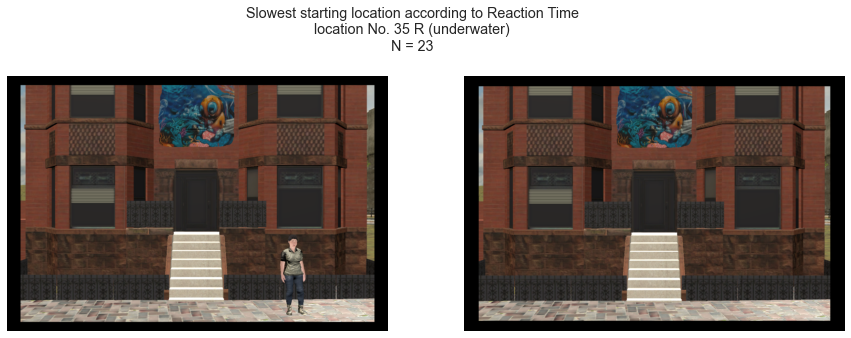

In [170]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

img_35_A = mpimg.imread(f'{IMG_PATH}/starting_locations/35_R(underwater)_A.PNG')
img_35_noA = mpimg.imread(f'{IMG_PATH}/starting_locations/35_R(underwater)_noA.PNG')

axes[0].imshow(img_35_A)
axes[1].imshow(img_35_noA)

[ax.grid(None) for ax in axes]
[ax.axis('off') for ax in axes]

plt.suptitle(f'Slowest starting location according to Reaction Time\nlocation No. 35 R (underwater)\nN = {N}', y=1.05)

fig.savefig(f'{PLOT_PATH}/slowest_loc_RT_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

#### Difference between slowest median RT and fastest

In [171]:
np.round((worst_df.Median.values[0] - best_df.Median.values[0]), 2)

33.32

#### Plot

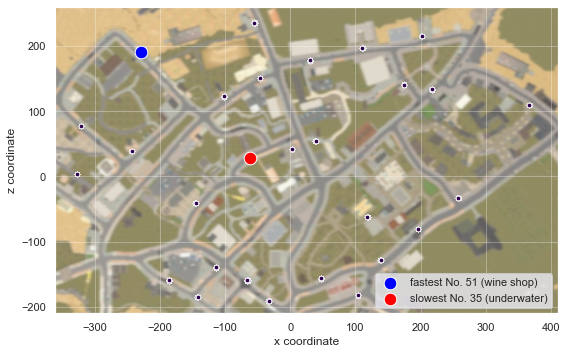

In [172]:
fig, ax = plt.subplots(figsize=(9,9))

fastest_loc_coord = df_cleaned.query('starting_loc_id == 51')[['starting_loc_x', 'starting_loc_z']].drop_duplicates(keep='first')
slowest_loc_coord = df_cleaned.query('starting_loc_id == 35')[['starting_loc_x', 'starting_loc_z']].drop_duplicates(keep='first')

img = plt.imread(f'{IMAGE_PATH}/starting_loc_map_color.jpg')
ax.imshow(img, extent=[-360, 410, -210, 260], alpha=.8)

sns.scatterplot(
    data=df_cleaned,
    x='body_pos_x',
    y='body_pos_z',
    s=80,
    marker='.'
).set(xlabel='x coordinate', ylabel='z coordinate')

sns.scatterplot(
    data=fastest_loc_coord,
    x='starting_loc_x',
    y='starting_loc_z',
    s=160,
    c=['blue'],
    marker='o',
    label='fastest No. 51 (wine shop)',
)

sns.scatterplot(
    data=slowest_loc_coord,
    x='starting_loc_x',
    y='starting_loc_z',
    s=160,
    c=['red'],
    marker='o',
    label='slowest No. 35 (underwater)',
)

# plt.suptitle(t=f'RT performance extremes in starting locations\nN = {N}', size=16)

ax.grid(alpha=.3)

plt.legend(loc='lower right')

fig.savefig(f'{PLOT_PATH}/fastest_slowest_starting_locations_RT_map.png', bbox_inches='tight', dpi=90)

plt.show()

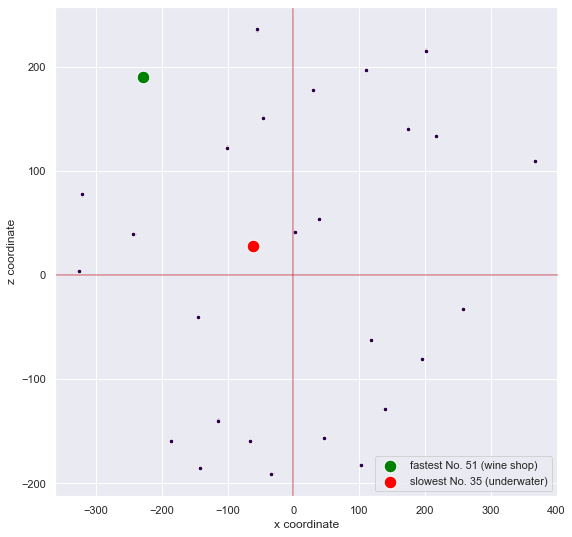

In [173]:
fig, _ = plt.subplots(figsize=(9,9))

fastest_loc_coord = df_cleaned.query('starting_loc_id == 51')[['starting_loc_x', 'starting_loc_z']].drop_duplicates(keep='first')
slowest_loc_coord = df_cleaned.query('starting_loc_id == 35')[['starting_loc_x', 'starting_loc_z']].drop_duplicates(keep='first')

sns.scatterplot(
    data=df_cleaned,
    x='body_pos_x',
    y='body_pos_z',
    s=80,
    marker='.'
).set(xlabel='x coordinate', ylabel='z coordinate')

sns.scatterplot(
    data=fastest_loc_coord,
    x='starting_loc_x',
    y='starting_loc_z',
    s=160,
    c=['green'],
    marker='o',
    label='fastest No. 51 (wine shop)',
)

sns.scatterplot(
    data=slowest_loc_coord,
    x='starting_loc_x',
    y='starting_loc_z',
    s=160,
    c=['red'],
    marker='o',
    label='slowest No. 35 (underwater)',
)

# plt.suptitle(t=f'RT performance extremes in starting locations\nN = {N}', size=16)
plt.axvline(x=0, color=colorblind_palette[2], alpha=.5)
plt.axhline(y=0, color=colorblind_palette[2], alpha=.5)

plt.grid(1)

plt.legend(loc='lower right')

fig.savefig(f'{PLOT_PATH}/fastest_slowest_starting_locations_RT.png', bbox_inches='tight', dpi=90)

plt.show()

#### Results

**Fastest starting location**: No. 51 `(S (wine shop))` with the lowest median `4.627` in reaction times.
**Slowest starting location**: No. 35 `(R (underwater))` with the highest median `7.747` in reaction times.

**Time difference between reaction times of the best and worst starting location**: `3.119` degree

## Linear Mixed Models

### Angular error

#### Choosing a reference starting location for predicting the `absolute angular error`

In [174]:
np.round(mean_median_angle_RT.sort_values('starting_loc_id'), 2)

starting_loc_name starting_loc_id absolute_180_angles           RT       
                                                      mean median  mean median
7            R (foxes)               1               46.73  35.66  7.40   5.62
16     S (boulangerie)               2               33.53  23.52  7.06   5.23
8          R (gorilla)               4               45.80  29.54  6.69   5.33
14      S (Maraz cafe)               5               62.77  51.25  8.56   7.49
2             R (bear)               7               38.73  25.52  7.74   6.02
22      S (patisserie)               9               27.50  19.18  7.45   5.49
23             S (pub)              14               41.37  27.83  8.28   6.42
1          R (baloons)              18               51.97  35.07  8.58   6.92
4     R (bottle spray)              19               43.03  28.01  6.52   5.28
18       S (fast food)              20               48.07  35.36  6.66   5.80
17    S (coffee store)              21               45.18  29.53  7.42   5.89
0         R (aligator)              25               39.21  28.96  7.30   5.57
24      S (restaurant)              29               56.85  41.60  7.22   6.00
11      R (purpul bat)              30               59.63  37.57  8.48   6.40
19  S (fish and chips)              34               47.02  35.35  8.18   6.20
13      R (underwater)              35               65.28  52.49  9.08   7.75
10       R (motorbike)              36               48.98  37.95  7.53   6.29
9            R (house)              37               47.12  37.38  8.68   6.69
15       S (bike shop)              38               39.22  31.61  7.61   5.65
6         R (dianthus)              40               51.19  37.99  8.52   6.35
5            R (daisy)              43               51.95  34.29  8.66   6.89
25       S (tool shop)              44               45.73  32.48  7.42   5.49
20     S (green store)              45               45.29  30.35  8.21   6.33
26       S (wine shop)              51               48.43  43.26  6.69   4.63
21      S (la cantine)              52               60.93  47.16  8.09   6.55
12            R (tree)              54               35.77  21.20  8.18   6.27
3             R (bird)              55               52.32  37.70  7.85   5.60
27    basketball court              58               66.85  49.85  7.45   5.83

In [175]:
overall_median = mean_median_overall.loc['median', ('absolute_180_angles', 'median')]
overall_mean = mean_median_overall.loc['mean', ('absolute_180_angles', 'mean')]

display(
    f'mean: {np.round(overall_mean, 2)}',
    f'median: {np.round(overall_median, 2)}'
)

'mean: 48.09'

'median: 35.21'

In [176]:
diff_df = (lmm_summary_angle
 .query('Mean >= (@overall_mean-2) & Mean < (@overall_mean+2)')
 .assign(
    diff_mean=np.abs(overall_mean - lmm_summary_angle.Mean),
    diff_median=np.abs(overall_median - lmm_summary_angle.Median))
           .sort_values('diff_mean', ascending=True)
 )

np.round(diff_df, 2)

starting_loc_id   starting_loc_name starting_loc_meaningful_cat    N  \
9               20       S (fast food)                  meaningful  276   
23              51       S (wine shop)                  meaningful  276   
16              36       R (motorbike)              non-meaningful  276   
17              37           R (house)              non-meaningful  276   
14              34  S (fish and chips)                  meaningful  275   
0                1           R (foxes)              non-meaningful  276   

     Mean     SD    SE  95% Conf.  Interval  Median  diff_mean  diff_median  
9   48.07  41.15  2.48      43.19     52.94   35.36       0.02         0.15  
23  48.43  34.04  2.05      44.40     52.46   43.26       0.34         8.05  
16  48.98  42.74  2.57      43.92     54.05   37.95       0.90         2.74  
17  47.12  39.84  2.40      42.40     51.84   37.38       0.97         2.17  
14  47.02  40.51  2.44      42.21     51.83   35.35       1.07         0.14  
0   46.73  41.60  2.50      41.80     51.66   35.66       1.36         0.45

##### Plot mean and median distributions for the angular error

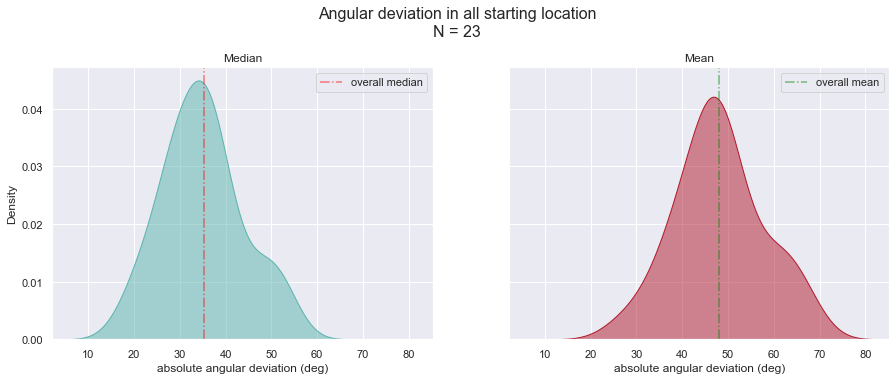

In [177]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharex=True, sharey=True)

sns.kdeplot(
    data=lmm_summary_angle,
    x='Median',
    shade='fill',
    alpha=.5,
    ax=axes[0],
    color=colorblind_palette[1],
).set(xlabel='absolute angular deviation (deg)', title='Median')

sns.kdeplot(
    data=lmm_summary_angle,
    x='Mean',
    shade='fill',
    alpha=.5,
    ax=axes[1],
    color=colorblind_palette[2],
).set(xlabel='absolute angular deviation (deg)', title='Mean')

axes[0].axvline(x=np.median(lmm_summary_angle.Median), alpha=.5, ls='-.', c='r', label='overall median')
axes[1].axvline(x=np.mean(lmm_summary_angle.Mean), alpha=.5, ls='-.', c='g', label='overall mean')

plt.suptitle(f'Angular deviation in all starting location\nN = {N}', size=16, y=1.05)

[ax.legend(loc='upper right') for ax in axes]

plt.show()

fig.savefig(f'{PLOT_PATH}/mean_median_grand_histogram_angle_{N}.png', bbox_inches='tight', dpi=90)

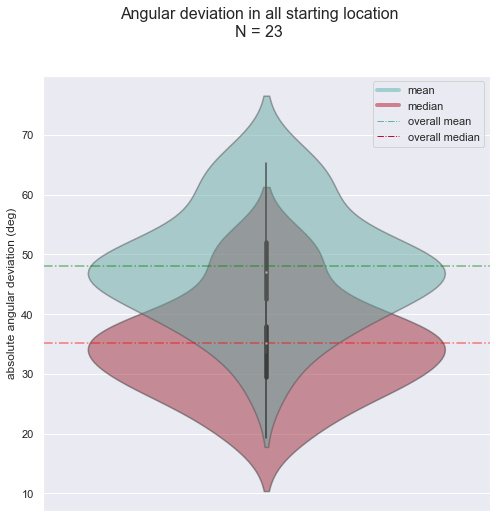

In [178]:
fig, axes = plt.subplots(figsize=(8,8))

sns.violinplot(
    data=lmm_summary_angle,
    y='Median',
    binwidth=1,
    orient='v',
    color=colorblind_palette[2],
)

sns.violinplot(
    data=lmm_summary_angle,
    y='Mean',
    binwidth=1,
    orient='v',
    color=colorblind_palette[1],
)

plt.axhline(y=np.median(lmm_summary_angle.Median), alpha=.5, ls='-.', c='r', label='overall median')
plt.axhline(y=np.mean(lmm_summary_angle.Mean), alpha=.5, ls='-.', c='g', label='overall mean')

plt.suptitle(f'Angular deviation in all starting location\nN = {N}', size=16, y=1)

plt.setp(axes, ylabel='absolute angular deviation (deg)')
plt.setp(axes.collections, alpha=.5)

custom_lines = [Line2D([0], [0], color=colorblind_palette[1], alpha=.5, lw=4),
                Line2D([0], [0], color=colorblind_palette[2], alpha=.5, lw=4),
                Line2D([0], [0], color=colorblind_palette[1], lw=1, ls='-.'),
                Line2D([0], [0], color=colorblind_palette[2], lw=1, ls='-.'),
                ]

plt.legend(handles=custom_lines, labels=['mean', 'median', 'overall mean', 'overall median'])

plt.show()

fig.savefig(f'{PLOT_PATH}/mean_median_grand_violin_angle_{N}.png', bbox_inches='tight', dpi=90)

##### Results

As a result the starting location `20 S(fast food)` is taken to be the reference due to its smaller distance from the grand mean.

In [179]:
reference_loc_id_angle = 20

#### Predicting `angular error` based on `starting location`

In [180]:
formula = f'absolute_180_angles ~ C(starting_loc_id, Treatment(reference={reference_loc_id_angle}))'

model_LM_angle_sl = smf.mixedlm(formula = formula, data = lmm_df, groups='subject_id').fit()
print(model_LM_angle_sl.summary())

                             Mixed Linear Model Regression Results
Model:                      MixedLM           Dependent Variable:           absolute_180_angles
No. Observations:           7708              Method:                       REML               
No. Groups:                 23                Scale:                        1713.9889          
Min. group size:            329               Log-Likelihood:               -39610.1276        
Max. group size:            336               Converged:                    Yes                
Mean group size:            335.1                                                              
-----------------------------------------------------------------------------------------------
                                                   Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------------------------------------------
Intercept                                          48.066    3.717 12

In [181]:
p_values = model_LM_angle_sl.pvalues.reset_index().rename(columns={0 : 'value'})
sig_values = p_values.query('value <= 0.05').sort_values('value')
non_sig_values = p_values.query('value > 0.05').sort_values('value')

display(
    f'significant values:',
    sig_values,

    f'insignificant values:',
    non_sig_values)

'significant values:'

index         value
0                                           Intercept  2.939609e-38
6    C(starting_loc_id, Treatment(reference=20))[T.9]  5.386738e-09
27  C(starting_loc_id, Treatment(reference=20))[T.58]  9.732212e-08
15  C(starting_loc_id, Treatment(reference=20))[T.35]  9.581234e-07
4    C(starting_loc_id, Treatment(reference=20))[T.5]  2.997105e-05
2    C(starting_loc_id, Treatment(reference=20))[T.2]  3.695156e-05
24  C(starting_loc_id, Treatment(reference=20))[T.52]  2.538328e-04
25  C(starting_loc_id, Treatment(reference=20))[T.54]  4.625532e-04
13  C(starting_loc_id, Treatment(reference=20))[T.30]  1.020311e-03
28                                     subject_id Var  1.278789e-03
5    C(starting_loc_id, Treatment(reference=20))[T.7]  8.370377e-03
11  C(starting_loc_id, Treatment(reference=20))[T.25]  1.198185e-02
18  C(starting_loc_id, Treatment(reference=20))[T.38]  1.212116e-02
12  C(starting_loc_id, Treatment(reference=20))[T.29]  1.265869e-02

'insignificant values:'

index     value
7   C(starting_loc_id, Treatment(reference=20))[T.14]  0.057464
9   C(starting_loc_id, Treatment(reference=20))[T.19]  0.152676
26  C(starting_loc_id, Treatment(reference=20))[T.55]  0.227914
8   C(starting_loc_id, Treatment(reference=20))[T.18]  0.265377
20  C(starting_loc_id, Treatment(reference=20))[T.43]  0.270689
19  C(starting_loc_id, Treatment(reference=20))[T.40]  0.375080
10  C(starting_loc_id, Treatment(reference=20))[T.21]  0.422541
22  C(starting_loc_id, Treatment(reference=20))[T.45]  0.434733
21  C(starting_loc_id, Treatment(reference=20))[T.44]  0.507096
3    C(starting_loc_id, Treatment(reference=20))[T.4]  0.519679
1    C(starting_loc_id, Treatment(reference=20))[T.1]  0.704866
14  C(starting_loc_id, Treatment(reference=20))[T.34]  0.760944
17  C(starting_loc_id, Treatment(reference=20))[T.37]  0.787642
16  C(starting_loc_id, Treatment(reference=20))[T.36]  0.794398
23  C(starting_loc_id, Treatment(reference=20))[T.51]  0.917489

In [182]:
non_sig = [1, 4, 14, 18, 19, 20, 21, 36, 37, 40, 43, 44, 45, 51, 55]
sig = [2, 5, 7, 9, 25, 29, 30, 35, 38, 52, 54, 58]

Creating plot dataframe

In [183]:
res_angle_sl = (
    df_cleaned[['starting_loc_id', 'starting_loc_name', 'starting_loc_x', 'starting_loc_z', 'starting_loc_meaningful_cat']].drop_duplicates(keep='first')
        .assign(Significance=df_cleaned.starting_loc_id.apply(lambda x: 'significant' if x in sig else 'non-significant')
)).rename(columns={'starting_loc_meaningful_cat' : 'Meaningfulness'})

res_angle_sl.sort_values('starting_loc_id')

starting_loc_id   starting_loc_name  starting_loc_x  starting_loc_z  \
6                  1           R (foxes)      257.839844      -32.619427   
76                 2     S (boulangerie)      201.651260      215.801544   
19                 4         R (gorilla)       47.080509     -156.391357   
60                 5      S (Maraz cafe)        2.451136       41.691082   
58                 7            R (bear)     -185.620300     -159.597656   
8                  9      S (patisserie)      366.741425      109.221771   
18                14             S (pub)      216.941421      133.503388   
45                18         R (baloons)      174.541840      140.806412   
4                 19    R (bottle spray)      110.677322      197.029724   
11                20       S (fast food)      195.920258      -80.497787   
7                 21    S (coffee store)      138.591415     -128.356964   
62                25        R (aligator)      103.361137     -182.246994   
48                29      S (restaurant)       30.083309      177.916245   
2                 30      R (purpul bat)       38.822807       53.957973   
35                34  S (fish and chips)      -46.292664      151.395493   
90                35      R (underwater)      -61.519260       27.766203   
1                 36       R (motorbike)      -65.603775     -159.510620   
22                37           R (house)      -33.352345     -190.505417   
23                38       S (bike shop)      -54.884190      235.924225   
54                40        R (dianthus)     -101.047653      122.551407   
13                43           R (daisy)     -145.235855      -40.267723   
0                 44       S (tool shop)     -114.325958     -139.534698   
50                45     S (green store)     -142.188049     -184.783508   
5                 51       S (wine shop)     -228.901550      190.179321   
61                52      S (la cantine)     -243.075241       39.462566   
77                54            R (tree)     -321.041016       77.596870   
106               55            R (bird)     -326.726471        3.927505   
28                58    basketball court      118.379997      -62.560001   

     Meaningfulness     Significance  
6    non-meaningful  non-significant  
76       meaningful      significant  
19   non-meaningful  non-significant  
60       meaningful      significant  
58   non-meaningful      significant  
8        meaningful      significant  
18       meaningful  non-significant  
45   non-meaningful  non-significant  
4    non-meaningful  non-significant  
11       meaningful  non-significant  
7        meaningful  non-significant  
62   non-meaningful      significant  
48       meaningful      significant  
2    non-meaningful      significant  
35       meaningful  non-significant  
90   non-meaningful      significant  
1    non-meaningful  non-significant  
22   non-meaningful  non-significant  
23       meaningful      significant  
54   non-meaningful  non-significant  
13   non-meaningful  non-significant  
0        meaningful  non-significant  
50       meaningful  non-significant  
5        meaningful  non-significant  
61       meaningful      significant  
77   non-meaningful      significant  
106  non-meaningful  non-significant  
28       meaningful      significant

##### Plots

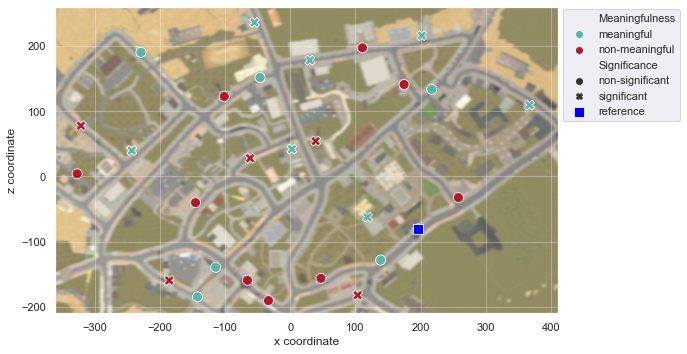

In [184]:
fig, ax = plt.subplots(figsize=(9,9))

ref_df = df_cleaned.query('starting_loc_id == @reference_loc_id_angle')[['starting_loc_x', 'starting_loc_z', 'starting_loc_meaningful_cat']].drop_duplicates(keep='first')

img = plt.imread(f'{IMAGE_PATH}/starting_loc_map_color.jpg')
ax.imshow(img, extent=[-360, 410, -210, 260], alpha=.8)

sns.scatterplot(
    data=res_angle_sl,
    x='starting_loc_x',
    y='starting_loc_z',
    hue='Meaningfulness',
    style='Significance',
    s=100,
    palette=colorblind_palette[1:3]
)

sns.scatterplot(
    data=ref_df,
    x='starting_loc_x',
    y='starting_loc_z',
    s=100,
    marker='s',
    color='b',
    label='reference',
).set(xlabel='x coordinate', ylabel='z coordinate')

ax.legend(bbox_to_anchor=(1, 1.01))

# plt.suptitle(t=f'Significance of starting locations in angular error\nlinear mixed models\nN = {N}', size=16, y=1)

ax.grid(alpha=.3)

fig.savefig(f'{PLOT_PATH}/significance_starting_locations_angular_error_map_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

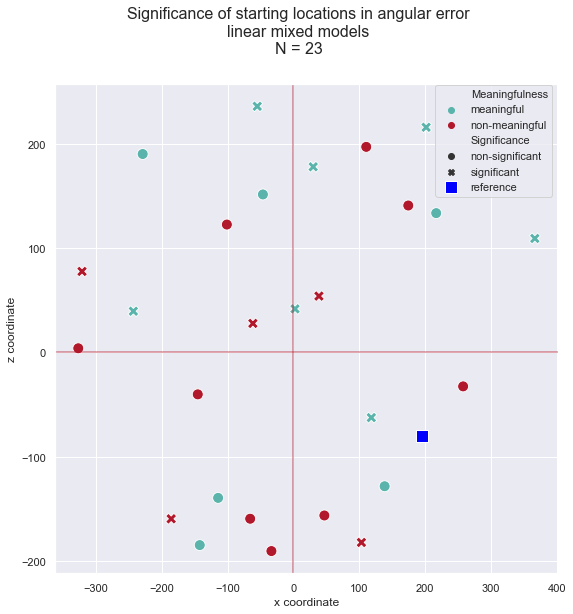

In [185]:
fig, ax = plt.subplots(figsize=(9,9))

ref_df = df_cleaned.query('starting_loc_id == @reference_loc_id_angle')[['starting_loc_x', 'starting_loc_z', 'starting_loc_meaningful_cat']].drop_duplicates(keep='first')

sns.scatterplot(
    data=res_angle_sl,
    x='starting_loc_x',
    y='starting_loc_z',
    hue='Meaningfulness',
    style='Significance',
    s=120,
    palette=colorblind_palette[1:3]
)

sns.scatterplot(
    data=ref_df,
    x='starting_loc_x',
    y='starting_loc_z',
    s=160,
    marker='s',
    color='b',
    label='reference',
).set(xlabel='x coordinate', ylabel='z coordinate')

ax.legend(bbox_to_anchor=(1, 1.01))

plt.suptitle(t=f'Significance of starting locations in angular error\nlinear mixed models\nN = {N}', size=16, y=1)

plt.axvline(x=0, color=colorblind_palette[2], alpha=.5)
plt.axhline(y=0, color=colorblind_palette[2], alpha=.5)

fig.savefig(f'{PLOT_PATH}/significance_starting_locations_angular_error_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

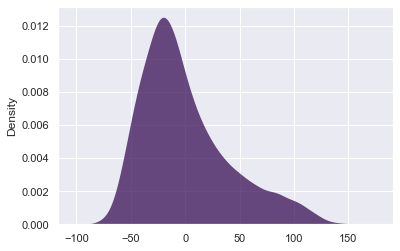

In [186]:
sns.kdeplot(model_LM_angle_sl.resid, shade='fill', palette='Crest', alpha=.7, linewidth=0)
plt.show()

In [187]:
mean_out = model_LM_angle_sl.params - model_LM_angle_sl.params.values[0]

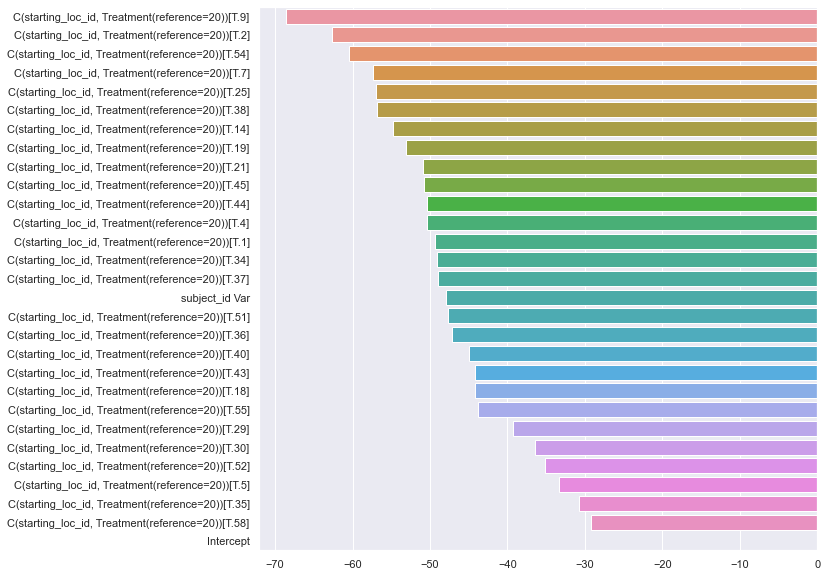

In [188]:
_, _ = plt.subplots(figsize=(10,10))

data = mean_out.sort_values()
sns.barplot(
    x=data,
    y=data.index,
)

plt.show()

##### Results

In comparison to starting location 20 (the reference point), starting location `58` has the least difference in angular error degree to the reference and the starting location `9` the most.

The starting locations `1, 4, 14, 18, 19, 20, 21, 36, 37, 40, 43, 44, 45, 51, 55` do not differ significantly from the reference starting location.
The starting locations `2, 5, 7, 9, 25, 29, 30, 35, 38, 52, 54, 58` affect the angular error significantly.


#### Predicting `angular error` based on `starting location` and `distance to target` and their interaction

In [189]:
formula = f'absolute_180_angles ~ C(starting_loc_id, Treatment(reference={reference_loc_id_angle})) + distance_to_target'

model_LM_angle_sl_dis_noInt = smf.mixedlm(formula = formula, data = lmm_df, groups='subject_id').fit()
print(model_LM_angle_sl_dis_noInt.summary())

                             Mixed Linear Model Regression Results
Model:                      MixedLM           Dependent Variable:           absolute_180_angles
No. Observations:           7708              Method:                       REML               
No. Groups:                 23                Scale:                        1710.3918          
Min. group size:            329               Log-Likelihood:               -39606.2344        
Max. group size:            336               Converged:                    Yes                
Mean group size:            335.1                                                              
-----------------------------------------------------------------------------------------------
                                                   Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------------------------------------------
Intercept                                          52.380    3.852 13

In [190]:
formula = f'absolute_180_angles ~ C(starting_loc_id, Treatment(reference={reference_loc_id_angle})) + distance_to_target + C(starting_loc_id, Treatment(reference={reference_loc_id_angle})):distance_to_target'

model_LM_angle_sl_dis = smf.mixedlm(formula = formula, data = lmm_df, groups='subject_id').fit()
print(model_LM_angle_sl_dis.summary())

                                      Mixed Linear Model Regression Results
Model:                            MixedLM                 Dependent Variable:                 absolute_180_angles
No. Observations:                 7708                    Method:                             REML               
No. Groups:                       23                      Scale:                              1705.2625          
Min. group size:                  329                     Log-Likelihood:                     -39660.7698        
Max. group size:                  336                     Converged:                          Yes                
Mean group size:                  335.1                                                                          
-----------------------------------------------------------------------------------------------------------------
                                                                      Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
------------

In [191]:
p_values = model_LM_angle_sl_dis.pvalues.reset_index().rename(columns={0 : 'value'})
sig_values = p_values.query('value <= 0.05').sort_values('value')
non_sig_values = p_values.query('value > 0.05').sort_values('value')

display(
    f'significant values:',
    sig_values,

    f'insignificant values:',
    non_sig_values)

'significant values:'

index         value
0                                           Intercept  9.518589e-17
27  C(starting_loc_id, Treatment(reference=20))[T.58]  4.497956e-06
56                                     subject_id Var  1.284139e-03
55  C(starting_loc_id, Treatment(reference=20))[T....  4.672540e-03
25  C(starting_loc_id, Treatment(reference=20))[T.54]  1.026153e-02
51  C(starting_loc_id, Treatment(reference=20))[T....  2.061661e-02
12  C(starting_loc_id, Treatment(reference=20))[T.29]  2.214681e-02
23  C(starting_loc_id, Treatment(reference=20))[T.51]  2.768114e-02
13  C(starting_loc_id, Treatment(reference=20))[T.30]  4.819658e-02

'insignificant values:'

index     value
24  C(starting_loc_id, Treatment(reference=20))[T.52]  0.093873
40  C(starting_loc_id, Treatment(reference=20))[T....  0.132064
45  C(starting_loc_id, Treatment(reference=20))[T....  0.157233
17  C(starting_loc_id, Treatment(reference=20))[T.37]  0.160967
15  C(starting_loc_id, Treatment(reference=20))[T.35]  0.175593
11  C(starting_loc_id, Treatment(reference=20))[T.25]  0.208983
20  C(starting_loc_id, Treatment(reference=20))[T.43]  0.218196
6    C(starting_loc_id, Treatment(reference=20))[T.9]  0.218520
10  C(starting_loc_id, Treatment(reference=20))[T.21]  0.233243
18  C(starting_loc_id, Treatment(reference=20))[T.38]  0.234999
53  C(starting_loc_id, Treatment(reference=20))[T....  0.246731
4    C(starting_loc_id, Treatment(reference=20))[T.5]  0.313763
49  C(starting_loc_id, Treatment(reference=20))[T....  0.313781
34  C(starting_loc_id, Treatment(reference=20))[T....  0.323362
48  C(starting_loc_id, Treatment(reference=20))[T....  0.323645
26  C(starting_loc_id, Treatment(reference=20))[T.55]  0.347601
38  C(starting_loc_id, Treatment(reference=20))[T....  0.351284
2    C(starting_loc_id, Treatment(reference=20))[T.2]  0.387626
5    C(starting_loc_id, Treatment(reference=20))[T.7]  0.390633
41  C(starting_loc_id, Treatment(reference=20))[T....  0.392155
30  C(starting_loc_id, Treatment(reference=20))[T....  0.423707
28                                 distance_to_target  0.445649
32  C(starting_loc_id, Treatment(reference=20))[T....  0.451161
36  C(starting_loc_id, Treatment(reference=20))[T....  0.452500
43  C(starting_loc_id, Treatment(reference=20))[T....  0.457988
14  C(starting_loc_id, Treatment(reference=20))[T.34]  0.471907
42  C(starting_loc_id, Treatment(reference=20))[T....  0.534082
50  C(starting_loc_id, Treatment(reference=20))[T....  0.542635
21  C(starting_loc_id, Treatment(reference=20))[T.44]  0.573975
37  C(starting_loc_id, Treatment(reference=20))[T....  0.633726
35  C(starting_loc_id, Treatment(reference=20))[T....  0.665023
7   C(starting_loc_id, Treatment(reference=20))[T.14]  0.685512
47  C(starting_loc_id, Treatment(reference=20))[T....  0.718761
54  C(starting_loc_id, Treatment(reference=20))[T....  0.757520
39  C(starting_loc_id, Treatment(reference=20))[T....  0.765699
3    C(starting_loc_id, Treatment(reference=20))[T.4]  0.772130
46  C(starting_loc_id, Treatment(reference=20))[T....  0.774348
33  C(starting_loc_id, Treatment(reference=20))[T....  0.780210
22  C(starting_loc_id, Treatment(reference=20))[T.45]  0.796223
16  C(starting_loc_id, Treatment(reference=20))[T.36]  0.826280
8   C(starting_loc_id, Treatment(reference=20))[T.18]  0.850400
9   C(starting_loc_id, Treatment(reference=20))[T.19]  0.863049
44  C(starting_loc_id, Treatment(reference=20))[T....  0.869067
29  C(starting_loc_id, Treatment(reference=20))[T....  0.937346
31  C(starting_loc_id, Treatment(reference=20))[T....  0.975877
1    C(starting_loc_id, Treatment(reference=20))[T.1]  0.979784
19  C(starting_loc_id, Treatment(reference=20))[T.40]  0.997924
52  C(starting_loc_id, Treatment(reference=20))[T....  0.998305

##### Plot

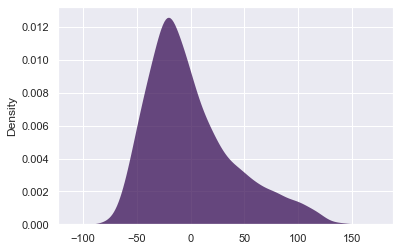

In [192]:
sns.kdeplot(model_LM_angle_sl_dis.resid, shade='fill', palette='Crest', alpha=.7, linewidth=0)
plt.show()

##### Result

In addition to the above reported results, `distance to target` also has a significant effect on the angular error. The interaction of starting location and distance to target is only significant at starting location `58`.

### Reaction Times (RT)

#### Choosing a reference starting location for predicting `RT`

In [193]:
overall_median = mean_median_overall.loc['median', ('RT', 'median')]
overall_mean = mean_median_overall.loc['mean', ('RT', 'mean')]

display(
    f'mean: {np.round(overall_mean, 2)}',
    f'median: {np.round(overall_median, 2)}'
)

'mean: 7.77'

'median: 6.01'

In [194]:
diff_df = (lmm_summary_RT
           .query('Median >= (@overall_median-0.2) & Median < (@overall_median+0.2)')
           .assign(
    diff_mean=np.abs(overall_mean - lmm_summary_RT.Mean),
    diff_median=np.abs(overall_median - lmm_summary_RT.Median))
           .sort_values('diff_median', ascending=True)
           )

diff_df

starting_loc_id   starting_loc_name starting_loc_meaningful_cat    N  \
12              29      S (restaurant)                  meaningful  276   
4                7            R (bear)              non-meaningful  274   
10              21    S (coffee store)                  meaningful  274   
27              58    basketball court                  meaningful  275   
14              34  S (fish and chips)                  meaningful  275   

      Mean      SD      SE  95% Conf.  Interval    Median  diff_mean  \
12  7.2204  4.8334  0.2909     6.6476    7.7931  6.004342   0.547512   
4   7.7374  5.5994  0.3383     7.0715    8.4034  6.015261   0.030512   
10  7.4214  4.9343  0.2981     6.8346    8.0083  5.893713   0.346512   
27  7.4454  5.0049  0.3018     6.8512    8.0395  5.829484   0.322512   
14  8.1813  6.0011  0.3619     7.4689    8.8938  6.204588   0.413388   

    diff_median  
12     0.005459  
4      0.005459  
10     0.116088  
27     0.180317  
14     0.194787

In [195]:
np.round(diff_df, 2)

starting_loc_id   starting_loc_name starting_loc_meaningful_cat    N  Mean  \
12              29      S (restaurant)                  meaningful  276  7.22   
4                7            R (bear)              non-meaningful  274  7.74   
10              21    S (coffee store)                  meaningful  274  7.42   
27              58    basketball court                  meaningful  275  7.45   
14              34  S (fish and chips)                  meaningful  275  8.18   

      SD    SE  95% Conf.  Interval  Median  diff_mean  diff_median  
12  4.83  0.29       6.65      7.79    6.00       0.55         0.01  
4   5.60  0.34       7.07      8.40    6.02       0.03         0.01  
10  4.93  0.30       6.83      8.01    5.89       0.35         0.12  
27  5.00  0.30       6.85      8.04    5.83       0.32         0.18  
14  6.00  0.36       7.47      8.89    6.20       0.41         0.19

##### Plot mean and median distributions for RT

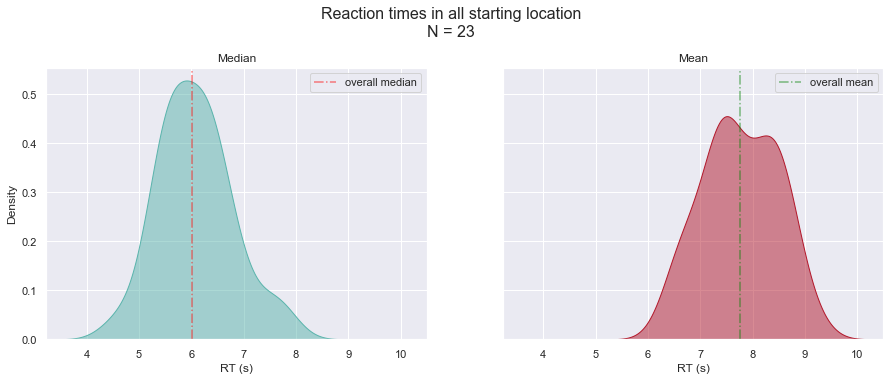

In [196]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharex=True, sharey=True)

sns.kdeplot(
    data=lmm_summary_RT,
    x='Median',
    fill='shape',
    alpha=.5,
    ax=axes[0],
    color=colorblind_palette[1],
).set(xlabel='RT (s)', title='Median')

sns.kdeplot(
    data=lmm_summary_RT,
    x='Mean',
    fill='shape',
    alpha=.5,
    ax=axes[1],
    color=colorblind_palette[2],
).set(xlabel='RT (s)', title='Mean')

axes[0].axvline(x=np.median(lmm_summary_RT.Median), alpha=.5, ls='-.', c='r', label='overall median')
axes[1].axvline(x=np.mean(lmm_summary_RT.Mean), alpha=.5, ls='-.', c='g', label='overall mean')

plt.suptitle(f'Reaction times in all starting location\nN = {N}', size=16, y=1.05)

[ax.legend(loc='upper right') for ax in axes]

# fig.savefig(f'{PLOT_PATH}/mean_median_grand_histogram_RT_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

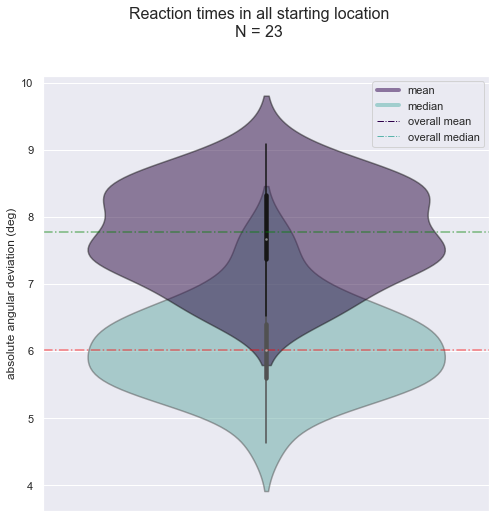

In [197]:
fig, axes = plt.subplots(figsize=(8,8))

sns.violinplot(
    data=lmm_summary_RT,
    y='Median',
    binwidth=1,
    orient='v',
    color=colorblind_palette[1],
)

sns.violinplot(
    data=lmm_summary_RT,
    y='Mean',
    binwidth=1,
    orient='v',
    color=colorblind_palette[0],
)

plt.axhline(y=np.median(lmm_summary_RT.Median), alpha=.5, ls='-.', c='r', label='overall median')
plt.axhline(y=np.mean(lmm_summary_RT.Mean), alpha=.5, ls='-.', c='g', label='overall mean')

plt.suptitle(f'Reaction times in all starting location\nN = {N}', size=16, y=1)

plt.setp(axes, ylabel='absolute angular deviation (deg)')
plt.setp(axes.collections, alpha=.5)

custom_lines = [Line2D([0], [0], color=colorblind_palette[0], alpha=.5, lw=4),
                Line2D([0], [0], color=colorblind_palette[1], alpha=.5, lw=4),
                Line2D([0], [0], color=colorblind_palette[0], lw=1, ls='-.'),
                Line2D([0], [0], color=colorblind_palette[1], lw=1, ls='-.'),
                ]

plt.legend(handles=custom_lines, labels=['mean', 'median', 'overall mean', 'overall median'])

plt.show()

fig.savefig(f'{PLOT_PATH}/mean_median_grand_violin_RT_{N}.png', bbox_inches='tight', dpi=90)

##### Results

There are starting locations `29 R(foxes)` and `7 R(bottle spray)` with the least difference to the grand median. Since this is the case, the distance of their means from the grand mean of RT is also secondarily taken into account for choosing one of them as reference for the analysis.
As a result the starting location `7 R(bottle spray)` is taken to be the reference due to its smaller distance from the grand mean.

In [198]:
reference_loc_id_RT = 7

#### Predicting `RT` based on `starting location`

In [199]:
formula = f'RT ~ C(starting_loc_id, Treatment(reference={reference_loc_id_RT}))'

model_LM_RT_sl = smf.mixedlm(formula = formula, data = lmm_df, groups='subject_id').fit()
print(model_LM_RT_sl.summary())

                           Mixed Linear Model Regression Results
Model:                        MixedLM            Dependent Variable:            RT         
No. Observations:             7708               Method:                        REML       
No. Groups:                   23                 Scale:                         26.9503    
Min. group size:              329                Log-Likelihood:                -23667.5718
Max. group size:              336                Converged:                     Yes        
Mean group size:              335.1                                                        
-------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------
Intercept                                         7.736    0.512 15.116 0.000  6.733  8.739
C(starting_loc_

In [200]:
p_values = model_LM_RT_sl.pvalues.reset_index().rename(columns={0 : 'value'})
sig_values = p_values.query('value <= 0.05').sort_values('value')
non_sig_values = p_values.query('value > 0.05').sort_values('value')

display(
    f'significant values:',
    sig_values,

    f'insignificant values:',
    non_sig_values)

'significant values:'

index         value
0                                          Intercept  1.271941e-51
28                                    subject_id Var  1.185895e-03
15  C(starting_loc_id, Treatment(reference=7))[T.35]  2.904587e-03
8   C(starting_loc_id, Treatment(reference=7))[T.19]  5.863308e-03
9   C(starting_loc_id, Treatment(reference=7))[T.20]  1.491184e-02
3    C(starting_loc_id, Treatment(reference=7))[T.4]  1.802955e-02
23  C(starting_loc_id, Treatment(reference=7))[T.51]  1.863588e-02
17  C(starting_loc_id, Treatment(reference=7))[T.37]  3.287137e-02
20  C(starting_loc_id, Treatment(reference=7))[T.43]  3.592705e-02

'insignificant values:'

index     value
7   C(starting_loc_id, Treatment(reference=7))[T.18]  0.051657
4    C(starting_loc_id, Treatment(reference=7))[T.5]  0.063697
19  C(starting_loc_id, Treatment(reference=7))[T.40]  0.078145
13  C(starting_loc_id, Treatment(reference=7))[T.30]  0.098178
2    C(starting_loc_id, Treatment(reference=7))[T.2]  0.127066
6   C(starting_loc_id, Treatment(reference=7))[T.14]  0.221112
12  C(starting_loc_id, Treatment(reference=7))[T.29]  0.244220
22  C(starting_loc_id, Treatment(reference=7))[T.45]  0.289021
14  C(starting_loc_id, Treatment(reference=7))[T.34]  0.314648
25  C(starting_loc_id, Treatment(reference=7))[T.54]  0.323468
11  C(starting_loc_id, Treatment(reference=7))[T.25]  0.327417
24  C(starting_loc_id, Treatment(reference=7))[T.52]  0.443971
1    C(starting_loc_id, Treatment(reference=7))[T.1]  0.449158
10  C(starting_loc_id, Treatment(reference=7))[T.21]  0.478806
21  C(starting_loc_id, Treatment(reference=7))[T.44]  0.481662
27  C(starting_loc_id, Treatment(reference=7))[T.58]  0.512316
5    C(starting_loc_id, Treatment(reference=7))[T.9]  0.516095
16  C(starting_loc_id, Treatment(reference=7))[T.36]  0.639650
18  C(starting_loc_id, Treatment(reference=7))[T.38]  0.771841
26  C(starting_loc_id, Treatment(reference=7))[T.55]  0.772407

In [201]:
non_sig = [1, 2, 5, 9, 14, 18, 21, 25, 29, 30, 34, 36, 38, 40, 44, 45, 52, 54, 55, 58]
sig = [4, 19, 20, 35, 37, 43, 51]

In [202]:
res_RT_sl = (
    df_cleaned[['starting_loc_id', 'starting_loc_name', 'starting_loc_x', 'starting_loc_z', 'starting_loc_meaningful_cat']].drop_duplicates(keep='first')
        .assign(Significance=df_cleaned.starting_loc_id.apply(lambda x: 'significant' if x in sig else 'non-significant')
                )).rename(columns={'starting_loc_meaningful_cat' : 'Meaningfulness'})

res_RT_sl.sort_values('starting_loc_id')

starting_loc_id   starting_loc_name  starting_loc_x  starting_loc_z  \
6                  1           R (foxes)      257.839844      -32.619427   
76                 2     S (boulangerie)      201.651260      215.801544   
19                 4         R (gorilla)       47.080509     -156.391357   
60                 5      S (Maraz cafe)        2.451136       41.691082   
58                 7            R (bear)     -185.620300     -159.597656   
8                  9      S (patisserie)      366.741425      109.221771   
18                14             S (pub)      216.941421      133.503388   
45                18         R (baloons)      174.541840      140.806412   
4                 19    R (bottle spray)      110.677322      197.029724   
11                20       S (fast food)      195.920258      -80.497787   
7                 21    S (coffee store)      138.591415     -128.356964   
62                25        R (aligator)      103.361137     -182.246994   
48                29      S (restaurant)       30.083309      177.916245   
2                 30      R (purpul bat)       38.822807       53.957973   
35                34  S (fish and chips)      -46.292664      151.395493   
90                35      R (underwater)      -61.519260       27.766203   
1                 36       R (motorbike)      -65.603775     -159.510620   
22                37           R (house)      -33.352345     -190.505417   
23                38       S (bike shop)      -54.884190      235.924225   
54                40        R (dianthus)     -101.047653      122.551407   
13                43           R (daisy)     -145.235855      -40.267723   
0                 44       S (tool shop)     -114.325958     -139.534698   
50                45     S (green store)     -142.188049     -184.783508   
5                 51       S (wine shop)     -228.901550      190.179321   
61                52      S (la cantine)     -243.075241       39.462566   
77                54            R (tree)     -321.041016       77.596870   
106               55            R (bird)     -326.726471        3.927505   
28                58    basketball court      118.379997      -62.560001   

     Meaningfulness     Significance  
6    non-meaningful  non-significant  
76       meaningful  non-significant  
19   non-meaningful      significant  
60       meaningful  non-significant  
58   non-meaningful  non-significant  
8        meaningful  non-significant  
18       meaningful  non-significant  
45   non-meaningful  non-significant  
4    non-meaningful      significant  
11       meaningful      significant  
7        meaningful  non-significant  
62   non-meaningful  non-significant  
48       meaningful  non-significant  
2    non-meaningful  non-significant  
35       meaningful  non-significant  
90   non-meaningful      significant  
1    non-meaningful  non-significant  
22   non-meaningful      significant  
23       meaningful  non-significant  
54   non-meaningful  non-significant  
13   non-meaningful      significant  
0        meaningful  non-significant  
50       meaningful  non-significant  
5        meaningful      significant  
61       meaningful  non-significant  
77   non-meaningful  non-significant  
106  non-meaningful  non-significant  
28       meaningful  non-significant

##### Plots

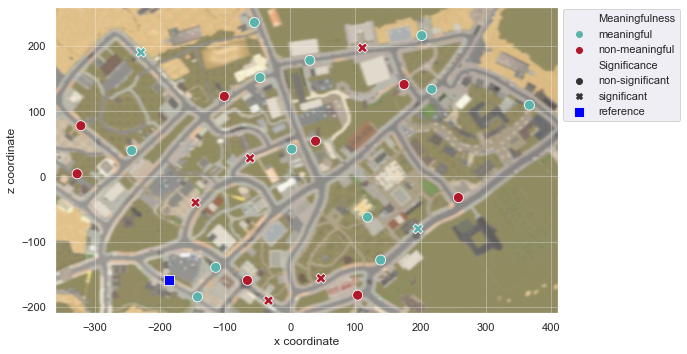

In [203]:
fig, ax = plt.subplots(figsize=(9,9))

ref_df = df_cleaned.query('starting_loc_id == @reference_loc_id_RT')[['starting_loc_x', 'starting_loc_z', 'starting_loc_meaningful_cat']].drop_duplicates(keep='first')

img = plt.imread(f'{IMAGE_PATH}/starting_loc_map_color.jpg')
ax.imshow(img, extent=[-360, 410, -210, 260], alpha=.8)

sns.scatterplot(
    data=res_RT_sl,
    x='starting_loc_x',
    y='starting_loc_z',
    hue='Meaningfulness',
    style='Significance',
    s=100,
    palette=colorblind_palette[1:3]
)

sns.scatterplot(
    data=ref_df,
    x='starting_loc_x',
    y='starting_loc_z',
    s=100,
    marker='s',
    color='b',
    label='reference',
).set(xlabel='x coordinate', ylabel='z coordinate')

plt.legend(bbox_to_anchor=(1, 1.01))

# plt.suptitle(t=f'Significance and meaningfulness of starting locations in reaction times\nlinear mixed models\nN = {N}', size=16, y=1)

ax.grid(alpha=.3)

fig.savefig(f'{PLOT_PATH}/significance_starting_locations_RT_map_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

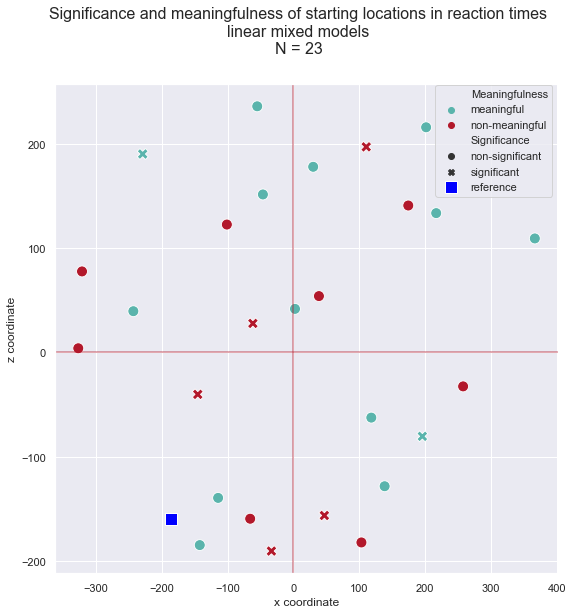

In [204]:
fig, _ = plt.subplots(figsize=(9,9))

ref_df = df_cleaned.query('starting_loc_id == @reference_loc_id_RT')[['starting_loc_x', 'starting_loc_z', 'starting_loc_meaningful_cat']].drop_duplicates(keep='first')


sns.scatterplot(
    data=res_RT_sl,
    x='starting_loc_x',
    y='starting_loc_z',
    hue='Meaningfulness',
    style='Significance',
    s=120,
    palette=colorblind_palette[1:3]
)

sns.scatterplot(
    data=ref_df,
    x='starting_loc_x',
    y='starting_loc_z',
    s=160,
    marker='s',
    color='b',
    label='reference',
).set(xlabel='x coordinate', ylabel='z coordinate')

plt.legend(bbox_to_anchor=(1, 1.01))

plt.suptitle(t=f'Significance and meaningfulness of starting locations in reaction times\nlinear mixed models\nN = {N}', size=16, y=1)

plt.axvline(x=0, color=colorblind_palette[2], alpha=.5)
plt.axhline(y=0, color=colorblind_palette[2], alpha=.5)

fig.savefig(f'{PLOT_PATH}/significance_starting_locations_RT_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

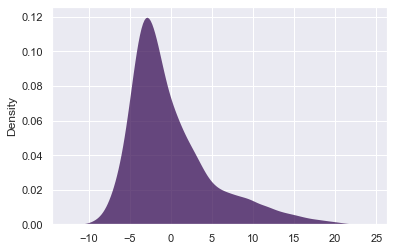

In [205]:
sns.kdeplot(model_LM_RT_sl.resid, shade='fill', palette='Crest', alpha=.7, linewidth=0)
plt.show()

In [206]:
mean_out = model_LM_RT_sl.params - model_LM_RT_sl.params.values[0]

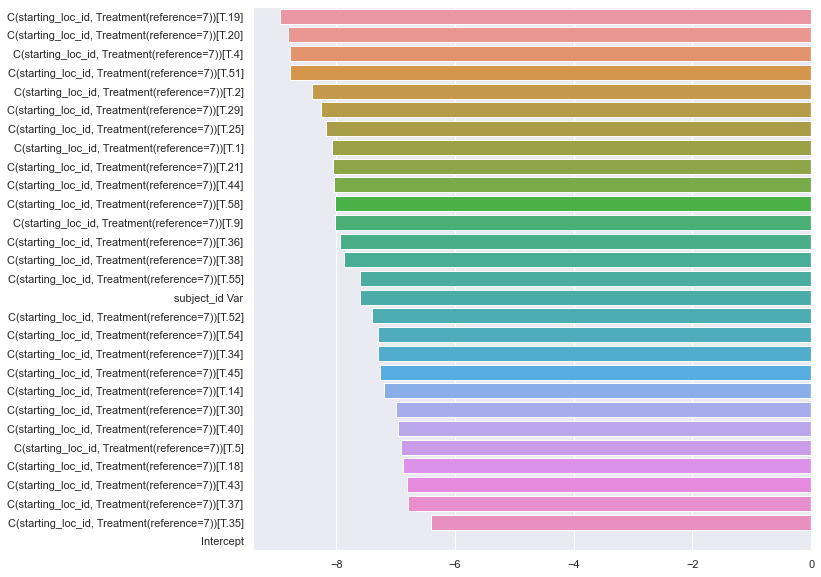

In [207]:
_, _ = plt.subplots(figsize=(10,10))

data = mean_out.sort_values()
sns.barplot(
    x=data,
    y=data.index,
)

plt.show()

##### Results

In comparison to starting location 7 (the reference point), starting location `35` has the least difference in reaction time to the reference and the starting location `19` the most.

The starting locations `1, 2, 5, 9, 14, 18, 21, 25, 29, 30, 34, 36, 38, 40, 44, 45, 52, 54, 55, 58` do not differ significantly from the reference starting location.
The starting locations `4, 19, 20, 35, 37, 43, 51` affect the reaction times significantly.

#### Predicting `RT` based on `starting location` and `distance to target` and their interaction

In [215]:
formula = f'RT ~ C(starting_loc_id, Treatment(reference={reference_loc_id_RT})) + distance_to_target + C(starting_loc_id, Treatment(reference={reference_loc_id_angle})):distance_to_target'

model_LM_RT_sl_dis = smf.mixedlm(formula = formula, data = lmm_df, groups='subject_id').fit()
print(model_LM_RT_sl_dis.summary())

                                     Mixed Linear Model Regression Results
Model:                              MixedLM                   Dependent Variable:                   RT         
No. Observations:                   7708                      Method:                               REML       
No. Groups:                         23                        Scale:                                26.9754    
Min. group size:                    329                       Log-Likelihood:                       -23799.5171
Max. group size:                    336                       Converged:                            Yes        
Mean group size:                    335.1                                                                      
---------------------------------------------------------------------------------------------------------------
                                                                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------

In [209]:
p_values = model_LM_RT_sl_dis.pvalues.reset_index().rename(columns={0 : 'value'})
sig_values = p_values.query('value <= 0.05').sort_values('value')
non_sig_values = p_values.query('value > 0.05').sort_values('value')

display(
    f'significant values:',
    sig_values,

    f'insignificant values:',
    non_sig_values)

'significant values:'

index         value
0                                           Intercept  1.316866e-18
56                                     subject_id Var  1.186439e-03
17  C(starting_loc_id, Treatment(reference=20))[T.37]  2.474018e-02

'insignificant values:'

index     value
43  C(starting_loc_id, Treatment(reference=20))[T....  0.080992
38  C(starting_loc_id, Treatment(reference=20))[T....  0.110383
19  C(starting_loc_id, Treatment(reference=20))[T.40]  0.113526
26  C(starting_loc_id, Treatment(reference=20))[T.55]  0.123133
21  C(starting_loc_id, Treatment(reference=20))[T.44]  0.149377
53  C(starting_loc_id, Treatment(reference=20))[T....  0.149495
7   C(starting_loc_id, Treatment(reference=20))[T.14]  0.202482
4    C(starting_loc_id, Treatment(reference=20))[T.5]  0.216345
46  C(starting_loc_id, Treatment(reference=20))[T....  0.220315
31  C(starting_loc_id, Treatment(reference=20))[T....  0.241400
20  C(starting_loc_id, Treatment(reference=20))[T.43]  0.251678
8   C(starting_loc_id, Treatment(reference=20))[T.18]  0.271296
41  C(starting_loc_id, Treatment(reference=20))[T....  0.297811
3    C(starting_loc_id, Treatment(reference=20))[T.4]  0.299950
52  C(starting_loc_id, Treatment(reference=20))[T....  0.312495
48  C(starting_loc_id, Treatment(reference=20))[T....  0.337913
36  C(starting_loc_id, Treatment(reference=20))[T....  0.362100
39  C(starting_loc_id, Treatment(reference=20))[T....  0.390727
22  C(starting_loc_id, Treatment(reference=20))[T.45]  0.398091
42  C(starting_loc_id, Treatment(reference=20))[T....  0.411796
49  C(starting_loc_id, Treatment(reference=20))[T....  0.420736
9   C(starting_loc_id, Treatment(reference=20))[T.19]  0.422841
28                                 distance_to_target  0.424223
2    C(starting_loc_id, Treatment(reference=20))[T.2]  0.435462
55  C(starting_loc_id, Treatment(reference=20))[T....  0.442773
13  C(starting_loc_id, Treatment(reference=20))[T.30]  0.451152
15  C(starting_loc_id, Treatment(reference=20))[T.35]  0.458809
50  C(starting_loc_id, Treatment(reference=20))[T....  0.460058
12  C(starting_loc_id, Treatment(reference=20))[T.29]  0.461446
37  C(starting_loc_id, Treatment(reference=20))[T....  0.463914
10  C(starting_loc_id, Treatment(reference=20))[T.21]  0.489251
34  C(starting_loc_id, Treatment(reference=20))[T....  0.493828
29  C(starting_loc_id, Treatment(reference=20))[T....  0.518736
14  C(starting_loc_id, Treatment(reference=20))[T.34]  0.541110
33  C(starting_loc_id, Treatment(reference=20))[T....  0.543040
24  C(starting_loc_id, Treatment(reference=20))[T.52]  0.592197
5    C(starting_loc_id, Treatment(reference=20))[T.7]  0.595217
32  C(starting_loc_id, Treatment(reference=20))[T....  0.603190
16  C(starting_loc_id, Treatment(reference=20))[T.36]  0.670887
45  C(starting_loc_id, Treatment(reference=20))[T....  0.672537
44  C(starting_loc_id, Treatment(reference=20))[T....  0.676817
35  C(starting_loc_id, Treatment(reference=20))[T....  0.720990
30  C(starting_loc_id, Treatment(reference=20))[T....  0.728922
18  C(starting_loc_id, Treatment(reference=20))[T.38]  0.739525
40  C(starting_loc_id, Treatment(reference=20))[T....  0.758631
23  C(starting_loc_id, Treatment(reference=20))[T.51]  0.788988
54  C(starting_loc_id, Treatment(reference=20))[T....  0.790389
6    C(starting_loc_id, Treatment(reference=20))[T.9]  0.830217
11  C(starting_loc_id, Treatment(reference=20))[T.25]  0.831972
1    C(starting_loc_id, Treatment(reference=20))[T.1]  0.857497
25  C(starting_loc_id, Treatment(reference=20))[T.54]  0.908464
47  C(starting_loc_id, Treatment(reference=20))[T....  0.909070
51  C(starting_loc_id, Treatment(reference=20))[T....  0.912389
27  C(starting_loc_id, Treatment(reference=20))[T.58]  0.930102

##### Plot

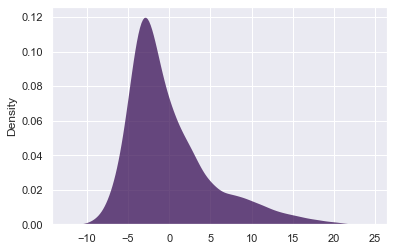

In [210]:
sns.kdeplot(model_LM_RT_sl_dis.resid, shade='fill', palette='Crest', alpha=.7, linewidth=0)
plt.show()

##### Result

`Distance to target` does not have a significant effect on the reaction times. There is also no interaction between the target distance and the reaction times.